## <ins>Import dependencies

In [162]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import scipy.stats as stats
import io
import base64

import warnings
warnings.filterwarnings("ignore")

In [163]:
import time

# Record start time
start_time = time.time()

## <ins>Read in the data from the preprocessed csv files

### df_cleaned

In [164]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

# Construct the absolute path to the CSV file
file_path = os.path.join(project_dir, "data/df_output/df_cleaned.csv")

# Load the CSV file
df_no_imputed = pd.read_csv(file_path)

# Show the df
df_no_imputed.head(2)

IDUSGS PLAYTYPE   WELLTYPE FORMSIMPLE      TDS   LATITUDE  LONGITUDE  \
0      63    Shale  Shale Gas  Marcellus  54800.0  40.441658 -79.986932   
1      64    Shale  Shale Gas  Marcellus  26100.0  40.441658 -79.986932   

          STATE     COUNTY           PROVINCE  ...  FeTot    K    Li     Mg  \
0  Pennsylvania  Allegheny  Appalachian Basin  ...  27.40  0.0  21.5  295.0   
1  Pennsylvania  Allegheny  Appalachian Basin  ...   6.47  0.0  12.5  188.0   

        Na    SO4     Sr      Zn  CHARGEBAL  BASIN_CATEGORY  
0  12000.0  105.0  736.5  0.0839      -10.5     Appalachian  
1   6920.0  116.0  215.0  0.0321       -3.0     Appalachian  

[2 rows x 34 columns]

In [165]:
df_no_imputed.columns

Index(['IDUSGS', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'TDS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 'WELLNAME', 'API',
       'DEPTHUPPER', 'DEPTHLOWER', 'PERIOD', 'DATESAMPLE', 'PH', 'B', 'Ba',
       'Br', 'HCO3', 'Ca', 'Cl', 'FeTot', 'K', 'Li', 'Mg', 'Na', 'SO4', 'Sr',
       'Zn', 'CHARGEBAL', 'BASIN_CATEGORY'],
      dtype='object')

In [166]:
df_no_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDUSGS          60658 non-null  int64  
 1   PLAYTYPE        60658 non-null  object 
 2   WELLTYPE        60658 non-null  object 
 3   FORMSIMPLE      60658 non-null  object 
 4   TDS             60658 non-null  float64
 5   LATITUDE        60658 non-null  float64
 6   LONGITUDE       60658 non-null  float64
 7   STATE           60658 non-null  object 
 8   COUNTY          60026 non-null  object 
 9   PROVINCE        60658 non-null  object 
 10  REGION          60658 non-null  object 
 11  WELLNAME        54693 non-null  object 
 12  API             34447 non-null  float64
 13  DEPTHUPPER      47354 non-null  float64
 14  DEPTHLOWER      40757 non-null  float64
 15  PERIOD          48402 non-null  object 
 16  DATESAMPLE      46382 non-null  object 
 17  PH              45174 non-null 

### df_cleaned_imputed

In [167]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

# Construct the absolute path to the CSV file
file_path = os.path.join(project_dir, "data/df_output/df_cleaned_imputed.csv")

# Load the CSV file
df_with_imputed = pd.read_csv(file_path)

# Show the df
df_with_imputed.head(2)

IDUSGS PLAYTYPE   WELLTYPE FORMSIMPLE      TDS   LATITUDE  LONGITUDE  \
0      63    Shale  Shale Gas  Marcellus  54800.0  40.441658 -79.986932   
1      64    Shale  Shale Gas  Marcellus  26100.0  40.441658 -79.986932   

          STATE     COUNTY           PROVINCE  ...  FeTot    K    Li     Mg  \
0  Pennsylvania  Allegheny  Appalachian Basin  ...  27.40  0.0  21.5  295.0   
1  Pennsylvania  Allegheny  Appalachian Basin  ...   6.47  0.0  12.5  188.0   

        Na    SO4     Sr      Zn  CHARGEBAL  BASIN_CATEGORY  
0  12000.0  105.0  736.5  0.0839      -10.5     Appalachian  
1   6920.0  116.0  215.0  0.0321       -3.0     Appalachian  

[2 rows x 34 columns]

In [168]:
df_with_imputed.columns

Index(['IDUSGS', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'TDS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 'WELLNAME', 'API',
       'DEPTHUPPER', 'DEPTHLOWER', 'PERIOD', 'DATESAMPLE', 'PH', 'B', 'Ba',
       'Br', 'HCO3', 'Ca', 'Cl', 'FeTot', 'K', 'Li', 'Mg', 'Na', 'SO4', 'Sr',
       'Zn', 'CHARGEBAL', 'BASIN_CATEGORY'],
      dtype='object')

In [169]:
df_with_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDUSGS          60658 non-null  int64  
 1   PLAYTYPE        60658 non-null  object 
 2   WELLTYPE        60658 non-null  object 
 3   FORMSIMPLE      60658 non-null  object 
 4   TDS             60658 non-null  float64
 5   LATITUDE        60658 non-null  float64
 6   LONGITUDE       60658 non-null  float64
 7   STATE           60658 non-null  object 
 8   COUNTY          60026 non-null  object 
 9   PROVINCE        60658 non-null  object 
 10  REGION          60658 non-null  object 
 11  WELLNAME        54693 non-null  object 
 12  API             34447 non-null  float64
 13  DEPTHUPPER      60658 non-null  float64
 14  DEPTHLOWER      40757 non-null  float64
 15  PERIOD          48402 non-null  object 
 16  DATESAMPLE      46382 non-null  object 
 17  PH              45174 non-null 

### df_{basin}_pca_with_target

In [170]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

dfs = []  # Create an empty list to store dataframes
basins = df_with_imputed['BASIN_CATEGORY'].unique()

for basin in basins:
    # Construct the absolute path to the CSV file
    file_path = os.path.join(project_dir, f"data/pca_data/byBasin_pca/{basin}_pca_with_target.csv")

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Add a new column for the basin name
    df['BASIN_CATEGORY'] = basin

    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes into one
df_pca_all_basins = pd.concat(dfs, ignore_index=True)

# Show the combined dataframe
print('Combined Dataframe:')
print('===============================')
print(df_pca_all_basins.head(2))
print('-------------------------------')
print(df_pca_all_basins.info())


Combined Dataframe:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.266081  1.874993  3.506635 -0.032301  0.030829 -0.788981 -0.449659   
1 -3.312880  1.560057  2.655659  0.048384  0.517013 -1.890688 -0.462558   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.058008 -1.115495 -1.019037 -0.773039 -0.126684  0.110222 -0.054233   
1 -0.556231 -0.148876 -0.132370 -0.226743 -0.031409  0.125099  0.028728   

       PC15    Li BASIN_CATEGORY  
0  0.026171  21.5    Appalachian  
1 -0.001987  12.5    Appalachian  
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PC1             60658 non-null  float64
 1   PC2             60658 non-null  float64
 2   PC3             60658 non-null  float64
 3   PC4             60658 non-null  float64
 4   PC5    

## <ins>Generate KNN regression models for each basin for consideration

### Establishing function for running models for each Basin given certain variable inputs

In [171]:
def generate_knn_models_by_basin(df, data_input, basins, test_size, random_state, k_values):
    
    '''Finalize data preprocessing per input variables / requirements of KNN regression model'''

    df_starting = df.copy()
    
    # Create an empty list to store results for each basin
    results_list = []

    for basin in basins:
        
        print('===============================')
        print(f'{basin}')
        print('===============================')

        '''--------------------------------------------------------------------------------------------------------------'''
        '''Finalize data preprocessing per input variables / requirements of KNN regression model'''

        # Drop rows from anything that isn't the 'basin' at hand
        df_basin = df_starting[df_starting['BASIN_CATEGORY'] == basin]

        # Drop the 'BASIN_CATEGORY' column as it is no longer needed
        df_basin.drop('BASIN_CATEGORY', axis=1, inplace=True)

        # Drop null values in the 'Li' (target) column
        df_basin.dropna(subset=['Li'], inplace=True)

        # Drop any remaining null values
        df_basin.dropna(inplace=True)

        # Get the remaining number of rows
        num_rows = df_basin.shape[0]
        print("Number of data points: ", num_rows)

        if num_rows > 0:

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Split testing/training sets'''

            # Splitting the data into features (X) and the target variable (y)
            y = df_basin['Li'].copy()                   # Target variable
            X = df_basin.drop(columns=['Li']).copy()    # Features

            # Splitting the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
            
            '''--------------------------------------------------------------------------------------------------------------'''
            '''Scale features'''

            if data_input != 'pca':
                # Standardize features by removing the mean and scaling to unit variance
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Train & test model'''

            # Create a parameter grid
            param_grid = {'n_neighbors': k_values}

            # Determine the number of splits for cross-validation
            n_samples = X_train.shape[0]
            # Print the number of samples in the training dataset
            print("Number of samples in the training dataset:", n_samples)
            n_splits = min(5, n_samples)  # Use 5 splits or the number of samples, whichever is smaller
            n_splits = max(2, n_splits)  # Ensure there are at least 2 splits

            # Perform grid search with cross-validation
            grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=n_splits, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)

            # Get the best k value
            best_k = grid_search.best_params_['n_neighbors']
            print("Best k value:", best_k)

            # Get the best model
            best_model = grid_search.best_estimator_

            # Evaluate the best model
            y_pred = best_model.predict(X_test)
    
            '''--------------------------------------------------------------------------------------------------------------'''
            '''Get all the performance metrics...'''

            # Calculate the mean squared error and the root mean squared error
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            # Calculate the variance of the target variable
            target_variance = np.var(y_test)

            # Calculate the mean absolute error
            mae = mean_absolute_error(y_test, y_pred)

            # Calculate R-squared
            r2 = r2_score(y_test, y_pred)

            # Calculate the percentage of predictions within certain percentage ranges
            percentage_ranges = [5, 15, 25, 50]  # Percentage ranges
            within_ranges = {}
            for percentage in percentage_ranges:
                threshold = (percentage / 100) * np.mean(y_test)
                within_ranges[f'within_{percentage}_percent'] = np.mean(np.abs(y_test - y_pred) <= threshold) * 100

            # Calculate percentage differences between predicted and actual values
            percentage_diff = (np.abs(y_pred - y_test) / y_test) * 100
            # Calculate the actual percentage range
            min_percentage_range = np.min(percentage_diff)
            max_percentage_range = np.max(percentage_diff)

            # Quantile regression loss at 25th, 50th, and 75th percentiles
            quantiles = [0.25, 0.5, 0.75]
            quantile_losses = [np.percentile(np.abs(y_test - y_pred), q * 100) for q in quantiles]

            # Perform k-fold cross-validation
            kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

            # Convert scores to positive values
            cv_scores = -cv_scores

            # Print the metrics
            print('-------------------------------')
            print("MODEL PERFORMANCE METRICS")
            print('-------------------------------')
            print("Variance of the target variable:", target_variance)
            print("MSE of the model:", mse)
            # Compare the MSE to the variance
            if mse < target_variance:
                print("The model's MSE is smaller than the variance of the target variable.")
                print("The model is capturing a significant portion of the variability in the target variable.")
            else:
                print("The model's MSE is close to or larger than the variance of the target variable.")
                print("The model's performance may be limited compared to the variability of the target variable.")
            print("RMSE of the model:", rmse)
            print("MAE of the best KNN model:", mae)
            print('-------------------------------')
            print("R-squared (Coefficient of Determination):", r2)
            print('-------------------------------')
            print(f"Percentage of predictions within different tolerance levels:")
            for percentage in percentage_ranges:
                print(f"±{percentage}%: ", within_ranges[f'within_{percentage}_percent'])
            print('-------------------------------')
            print(f"Minimum percentage difference: {min_percentage_range:.2f}%")
            print(f"Maximum percentage difference: {max_percentage_range:.2f}%")
            print('-------------------------------')
            print("Quantile regression loss:")
            for q, loss in zip(quantiles, quantile_losses):
                print(f"Quantile {q}: {loss}")
            print('-------------------------------')
            print("Cross-validation MSE scores:", cv_scores)
            print("Mean cross-validation MSE:", np.mean(cv_scores))
            print('-------------------------------')

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Generate descriptive plots'''

            #Directory where plots are saved
            model_type = 'knn'
            model_title_format = 'KNN'
            image_folder_path = f'../../images/{model_type}_plots'

            # Plot actual vs predicted values
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
            colors = ['lightblue', 'lightgreen', 'palegoldenrod', 'lightsalmon']
            for i, percentage in enumerate(percentage_ranges):
                threshold = (percentage / 100) * np.mean(y_test)
                plt.plot([min(y_test), max(y_test)], [min(y_test) + threshold, max(y_test) + threshold],
                        linestyle='--', color=colors[i], label=f'Within {percentage}%')
                plt.plot([min(y_test), max(y_test)], [min(y_test) - threshold, max(y_test) - threshold],
                        linestyle='--', color=colors[i])
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title(f'Actual vs Predicted Li Concentrations for {basin}\n{model_title_format} (K-value: {best_k})')
            plt.legend()
            image_file_name = f"{basin.replace(' ', '')}_actual_vs_predicted_{model_type}_{data_input}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Plot histogram of predicted Li concentration values
            plt.hist(y_pred, bins=20)
            plt.xlabel('Predicted Li Concentration')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of Predicted Li Concentrations for {basin}\n{model_title_format} (K-value: {best_k})')
            image_file_name = f"{basin.replace(' ', '')}_histogram_of_predicted_{model_type}_{data_input}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Plot histogram of residuals
            residuals = y_test - y_pred
            plt.hist(residuals, bins=20)
            plt.xlabel('Residuals')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of Residuals for {basin}\n{model_title_format} (K-value: {best_k})')
            image_file_name = f"{basin.replace(' ', '')}_histogram_of_residuals_{model_type}_{data_input}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Create a Q-Q plot of residuals
            stats.probplot(residuals, dist="norm", plot=plt)
            plt.title(f'Q-Q Plot of Residuals for {basin}\n{model_title_format} (K-value: {best_k})')
            image_file_name = f"{basin.replace(' ', '')}_qq_plot_of_residuals_{model_type}_{data_input}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Add results to a list to feed to the results dataframe'''

            # Append results to the list
            results_list.append([model_type, data_input, basin, num_rows, len(X.columns), list(X.columns), k_values, best_k, target_variance, mse, rmse, mae, 
                                 r2] + list(within_ranges.values()) + [min_percentage_range, max_percentage_range, quantile_losses[0], 
                                 quantile_losses[1], quantile_losses[2], np.mean(cv_scores)])

        else: 
            print(f'No {model_type} ({data_input}) model generated for {basin}.')

    # Create a DataFrame from the results list
    columns = ['method', 'data_input', 'Basin', 'data_row_count','feature_quantity', 'feature_list', 'k_options', 'best_k', 'Explained Variance', 'MSE', 
               'RMSE', 'MAE', 'R2'] + [f'Predicted Values ±{percentage}% of Actual' for percentage in percentage_ranges] + ['results_min%_difference', 
               'results_max%_difference', '0.25_quantile_loss', '0.5_quantile_loss', '0.75_quantile_loss', 'cross_val_mse']
    
    df_results = pd.DataFrame(results_list, columns=columns)

    # Round all values in the DataFrame to two decimal places
    df_results = df_results.round(2)

    # # Sort the DataFrame
    # df_results.sort_values(by=['within_15_percent'], ascending=False, inplace=True)

    return df_results

### INPUT: PCA

In [172]:
# Define the input df for this section
df = df_pca_all_basins.copy()

Appalachian
Number of data points:  652
Number of samples in the training dataset: 521
Best k value: 2
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 3653.6271444554536
MSE of the model: 2704.3078669847328
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 52.00296017521246
MAE of the best KNN model: 25.83530534351145
-------------------------------
R-squared (Coefficient of Determination): 0.25982927100576036
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  25.190839694656486
±15%:  48.091603053435115
±25%:  64.12213740458014
±50%:  80.91603053435115
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 3818.92%
-------------------------------
Quantile regression loss:
Quantile 0.25: 3.375
Qua

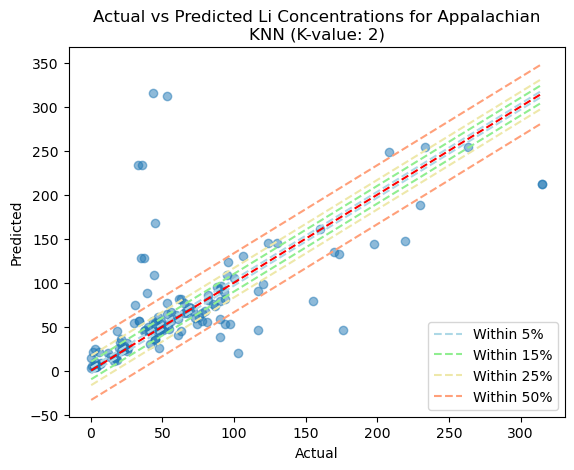

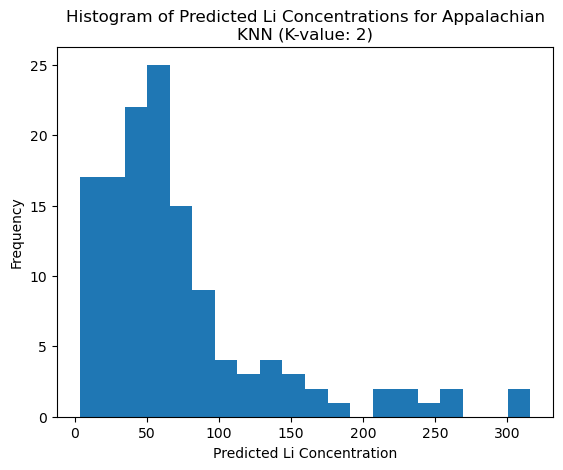

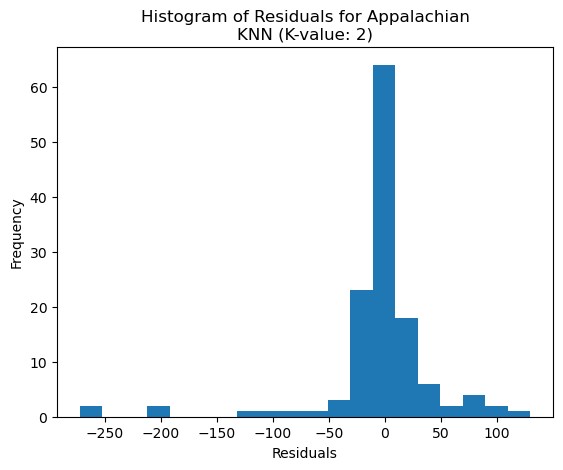

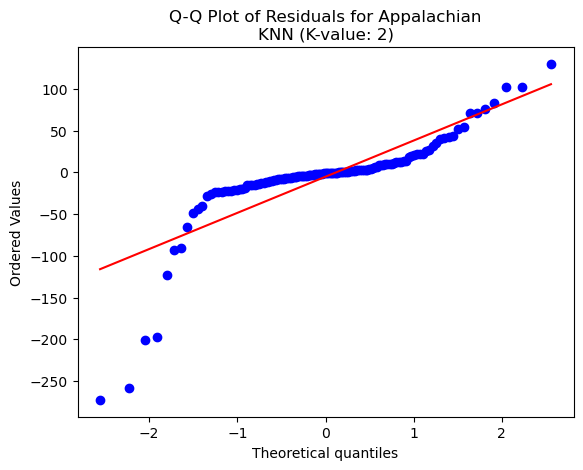

Permian
Number of data points:  481
Number of samples in the training dataset: 384
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 5085.172136847698
MSE of the model: 4861.634355555557
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 69.72542115724764
MAE of the best KNN model: 15.567422680412372
-------------------------------
R-squared (Coefficient of Determination): 0.04395874422271018
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  16.49484536082474
±15%:  44.329896907216494
±25%:  65.97938144329896
±50%:  91.75257731958763
-------------------------------
Minimum percentage difference: 0.81%
Maximum percentage difference: 879.17%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.0
Quantile 0.5

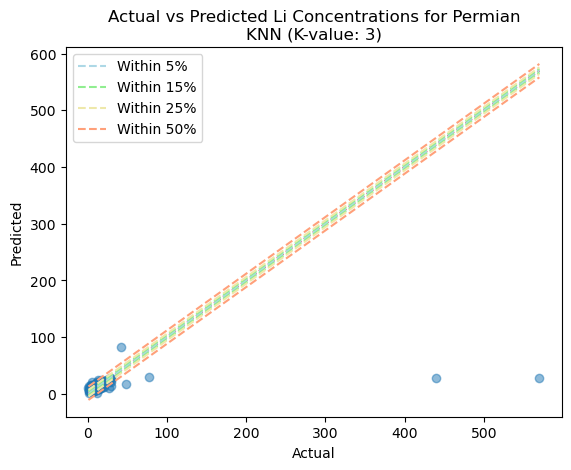

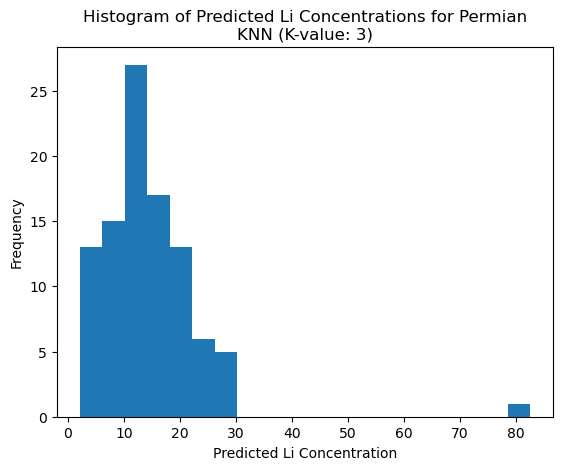

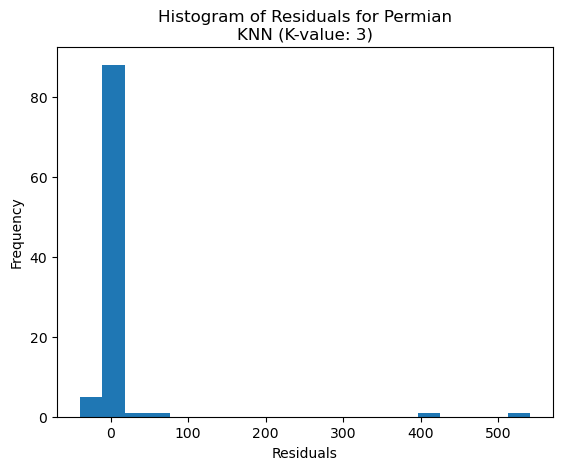

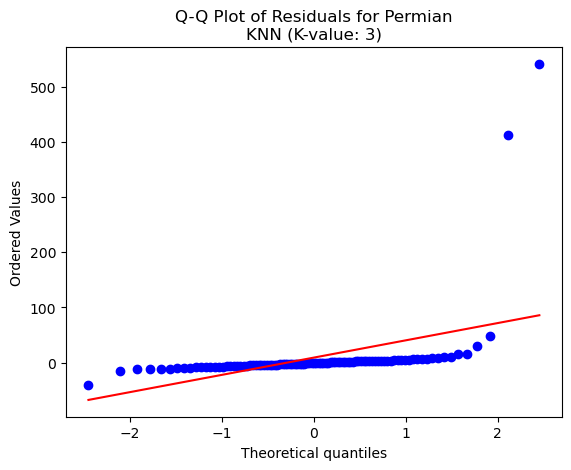

Oklahoma Platform
Number of data points:  254
Number of samples in the training dataset: 203
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 314.12745428681274
MSE of the model: 229.29814762745096
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 15.14259382098889
MAE of the best KNN model: 10.230267973856208
-------------------------------
R-squared (Coefficient of Determination): 0.27004741388159226
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  23.52941176470588
±15%:  29.411764705882355
±25%:  43.13725490196079
±50%:  68.62745098039215
-------------------------------
Minimum percentage difference: 0.94%
Maximum percentage difference: 294.28%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.07

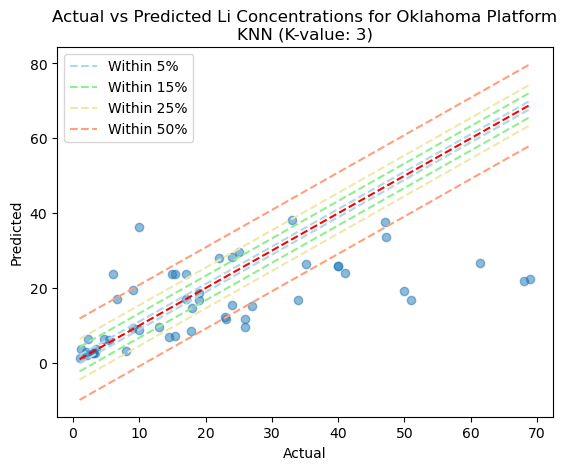

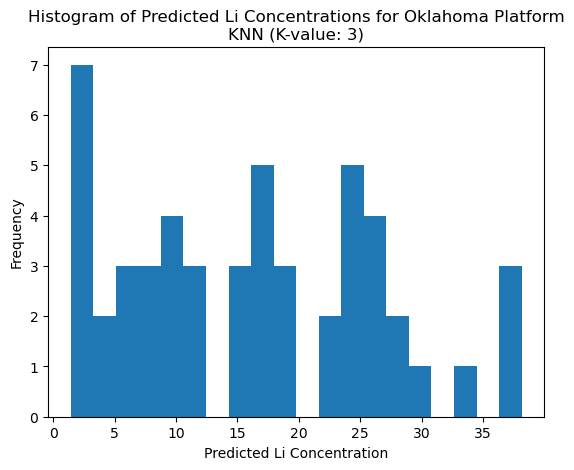

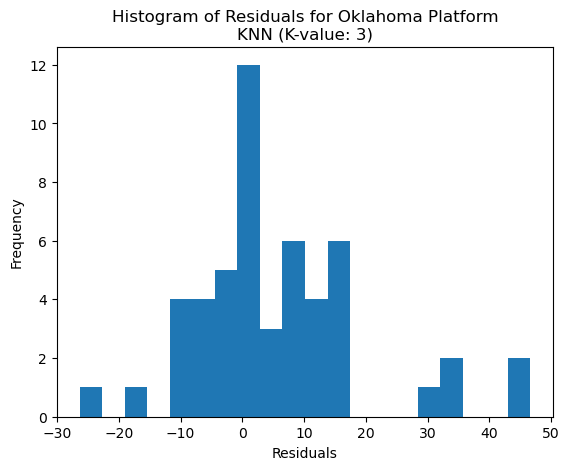

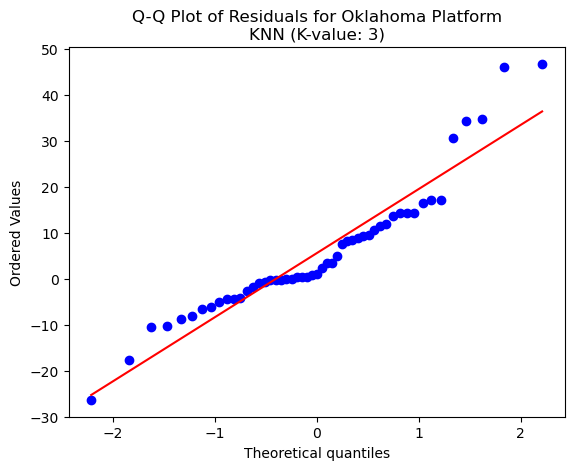

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 710
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 5656.327572816109
MSE of the model: 701.8744078179044
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 26.492912407244024
MAE of the best KNN model: 10.25641336516854
-------------------------------
R-squared (Coefficient of Determination): 0.8759134086945282
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  43.258426966292134
±15%:  62.35955056179775
±25%:  75.84269662921348
±50%:  87.07865168539325
-------------------------------
Minimum percentage difference: 0.30%
Maximum percentage difference: 5651.07%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.95500000000

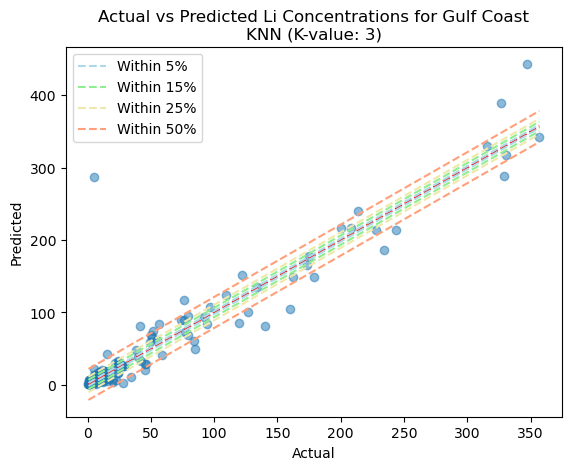

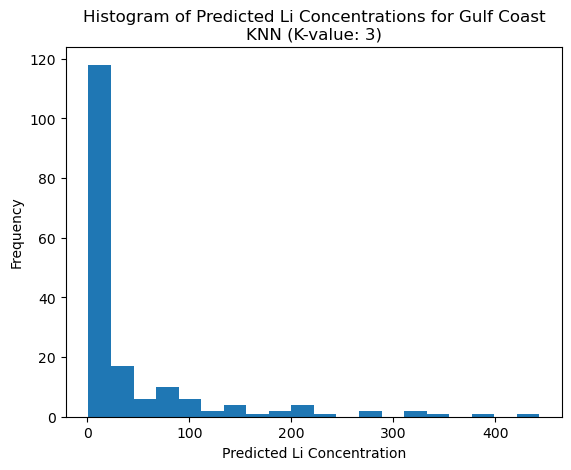

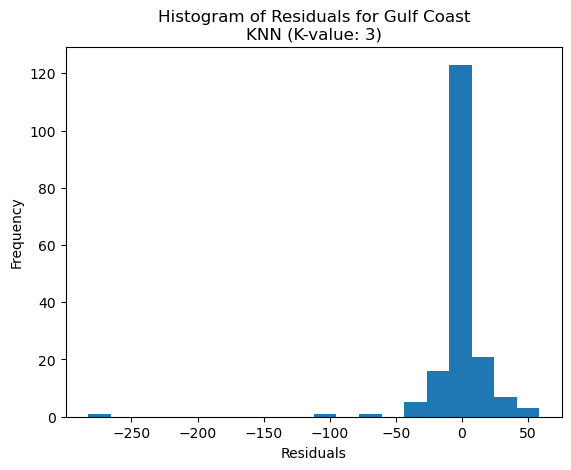

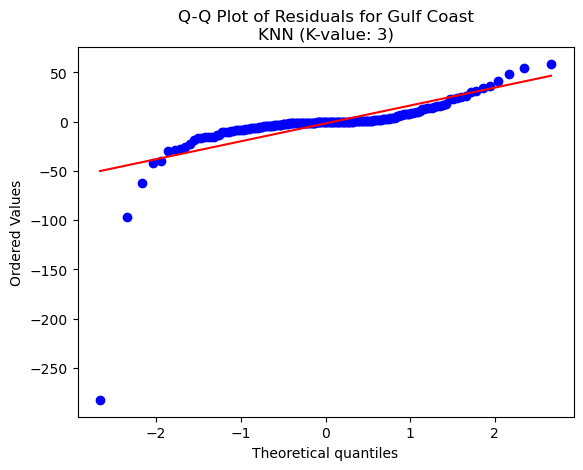

Williston
Number of data points:  502
Number of samples in the training dataset: 401
Best k value: 1
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 2304.8861222313562
MSE of the model: 1846.213234956832
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 42.967583536392084
MAE of the best KNN model: 13.27727524751713
-------------------------------
R-squared (Coefficient of Determination): 0.19900023816815904
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  41.584158415841586
±15%:  66.33663366336634
±25%:  75.24752475247524
±50%:  85.14851485148515
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 26215.79%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.003000000

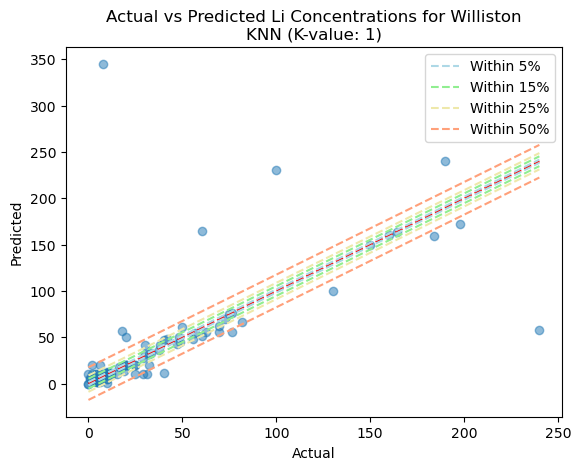

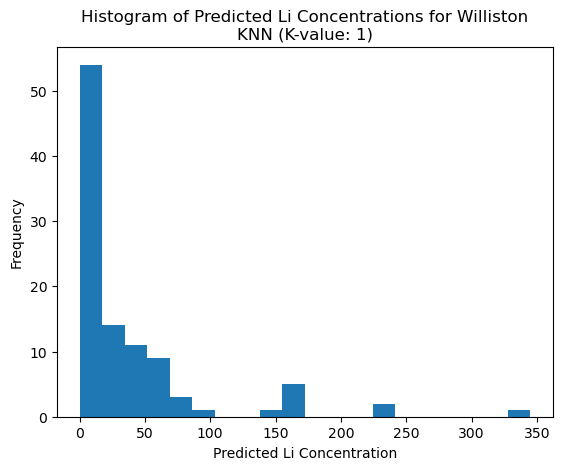

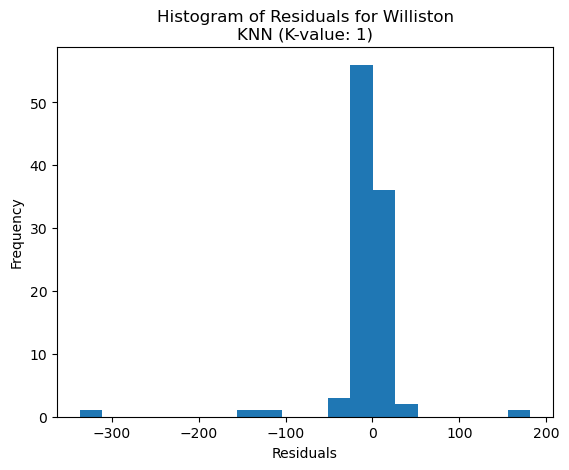

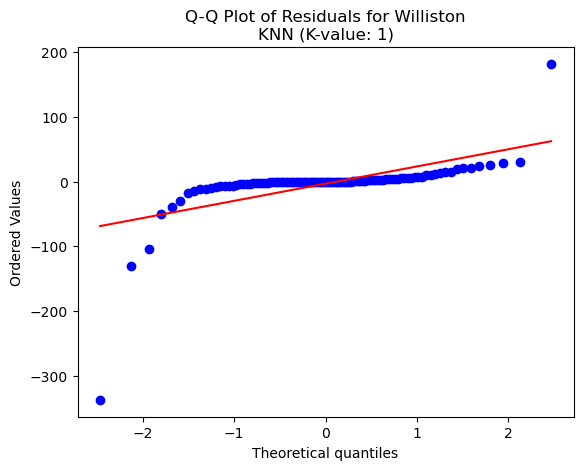

Michigan
Number of data points:  150
Number of samples in the training dataset: 120
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 399.72542455555555
MSE of the model: 100.72763148148147
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 10.036315632814736
MAE of the best KNN model: 6.815666666666666
-------------------------------
R-squared (Coefficient of Determination): 0.7480079442195153
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  23.333333333333332
±15%:  36.666666666666664
±25%:  50.0
±50%:  86.66666666666667
-------------------------------
Minimum percentage difference: 0.22%
Maximum percentage difference: 850.00%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.5241666666666664
Quantil

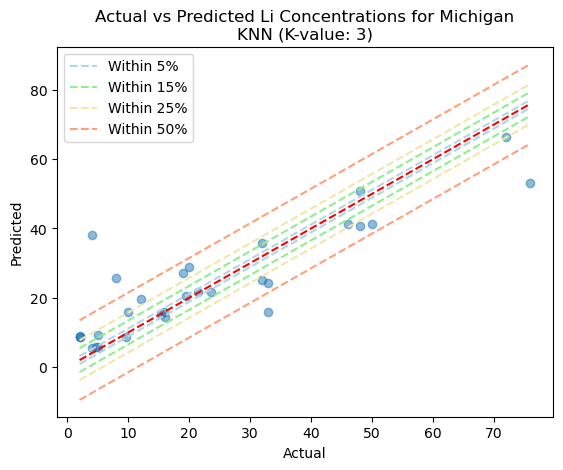

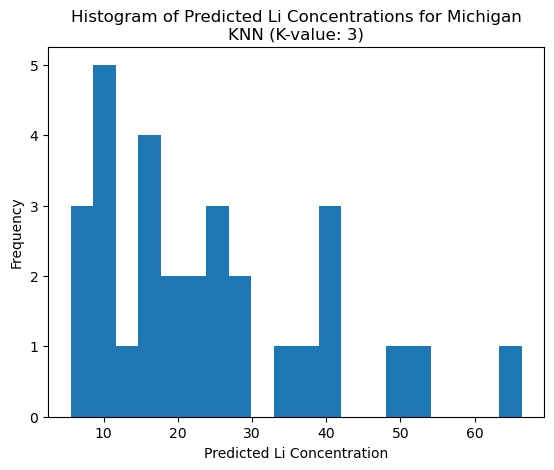

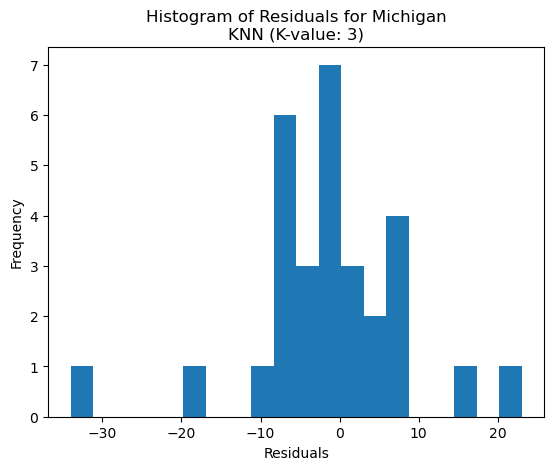

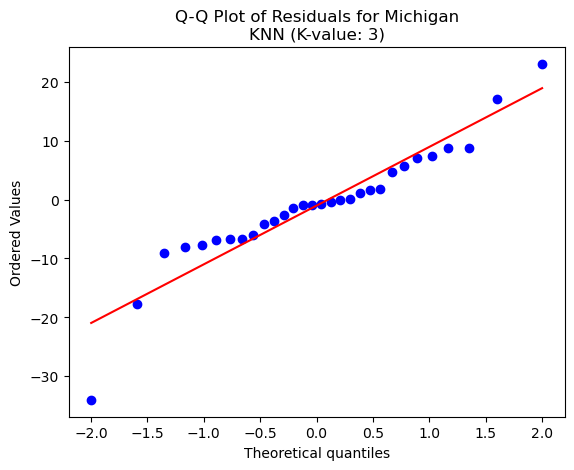

Pacific
Number of data points:  145
Number of samples in the training dataset: 116
Best k value: 2
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 10.355265992865641
MSE of the model: 5.174091379310344
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 2.2746629155350346
MAE of the best KNN model: 1.2148275862068967
-------------------------------
R-squared (Coefficient of Determination): 0.5003420112167969
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  27.586206896551722
±15%:  48.275862068965516
±25%:  58.620689655172406
±50%:  72.41379310344827
-------------------------------
Minimum percentage difference: 1.28%
Maximum percentage difference: 7382.35%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.0949999999

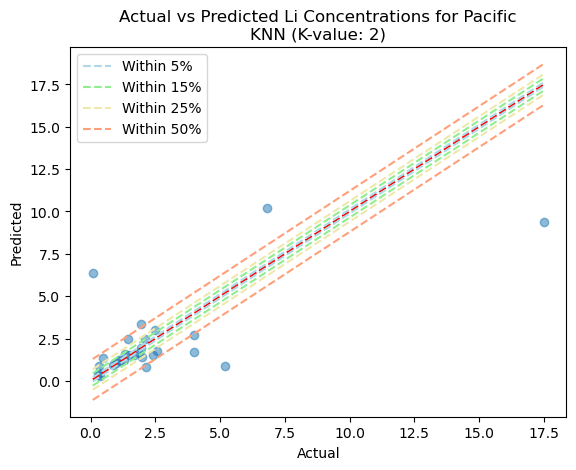

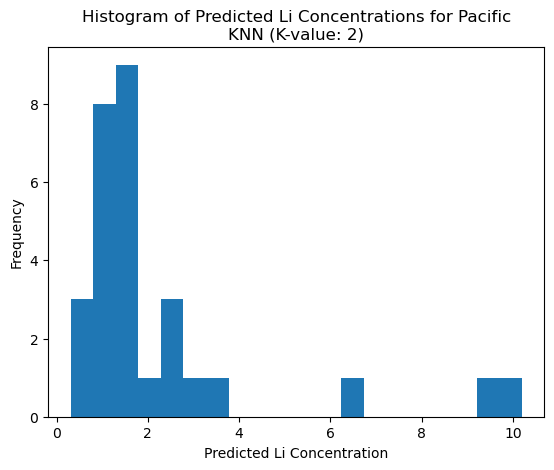

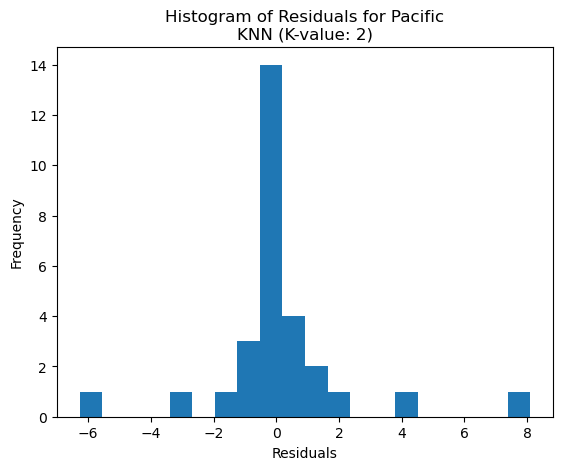

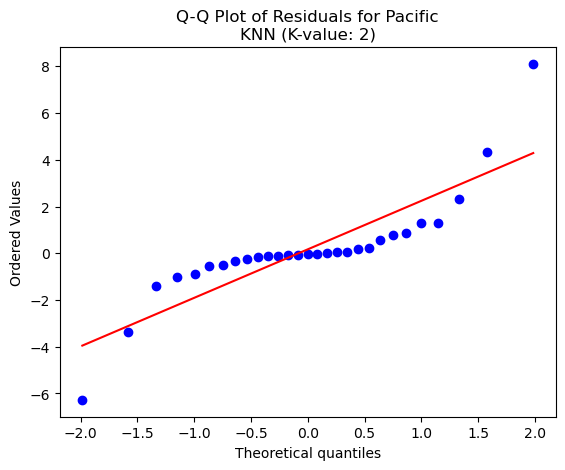

Illinois
Number of data points:  25
Number of samples in the training dataset: 20
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 191.199984
MSE of the model: 146.0639333333333
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 12.085691264190613
MAE of the best KNN model: 8.858666666666668
-------------------------------
R-squared (Coefficient of Determination): 0.2360672303543011
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  20.0
±15%:  40.0
±25%:  40.0
±50%:  60.0
-------------------------------
Minimum percentage difference: 0.78%
Maximum percentage difference: 241.94%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.333333333333332
Quantile 0.5: 5.249999999999999
Quantile 0.75: 14.7
--------

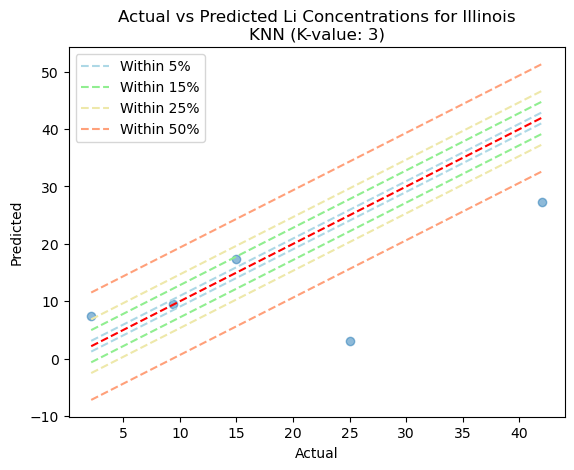

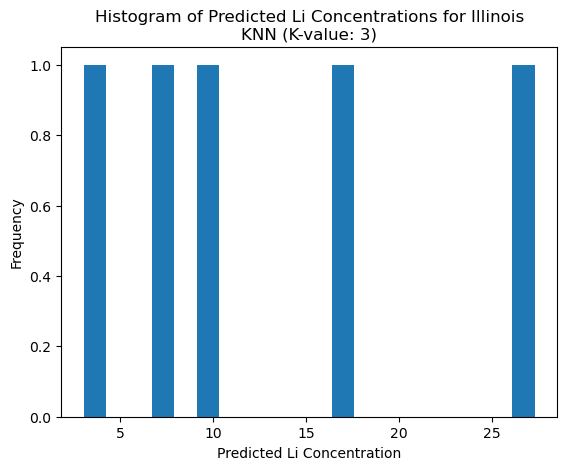

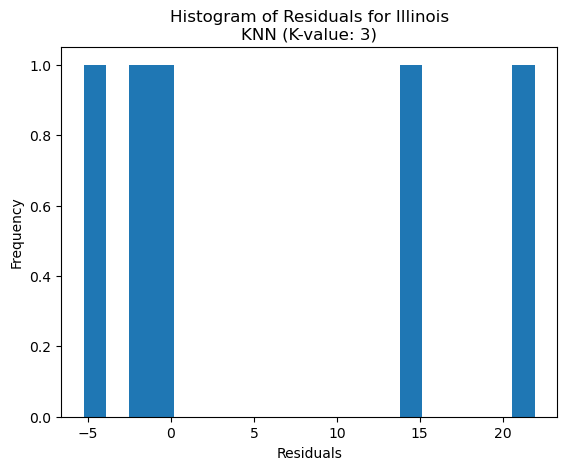

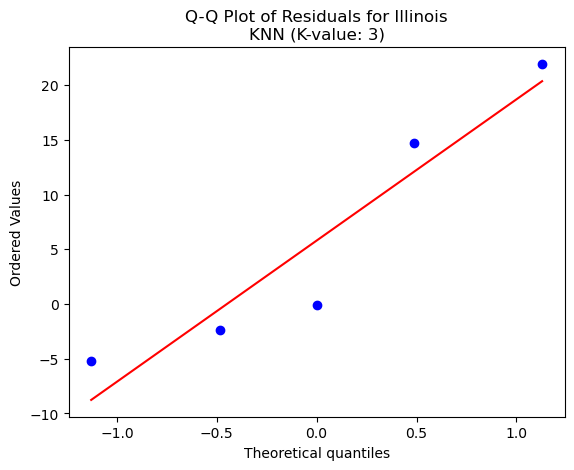

Great Plains
Number of data points:  62
Number of samples in the training dataset: 49
Best k value: 2
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 37307.22484852071
MSE of the model: 40328.94709423077
The model's MSE is close to or larger than the variance of the target variable.
The model's performance may be limited compared to the variability of the target variable.
RMSE of the model: 200.8206839302933
MAE of the best KNN model: 57.54115384615385
-------------------------------
R-squared (Coefficient of Determination): -0.08099563175709856
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  76.92307692307693
±15%:  92.3076923076923
±25%:  92.3076923076923
±50%:  92.3076923076923
-------------------------------
Minimum percentage difference: 2.21%
Maximum percentage difference: 99.31%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.30

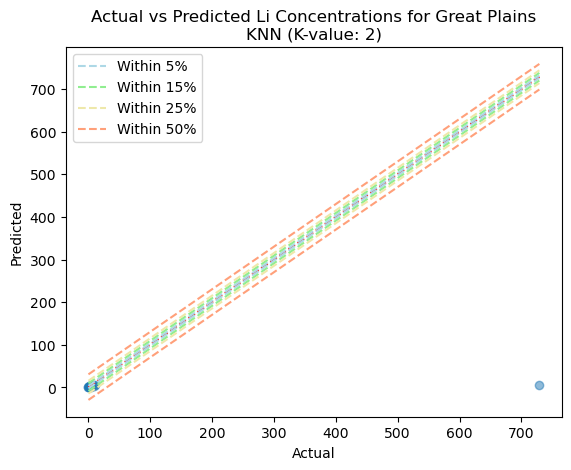

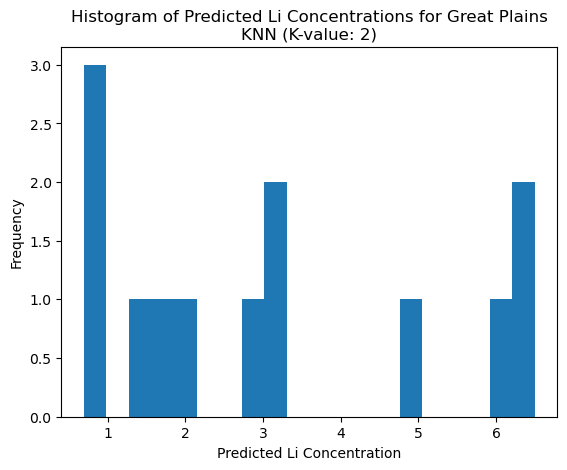

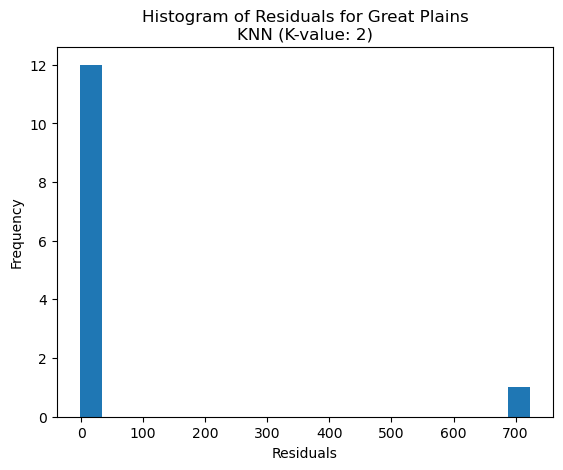

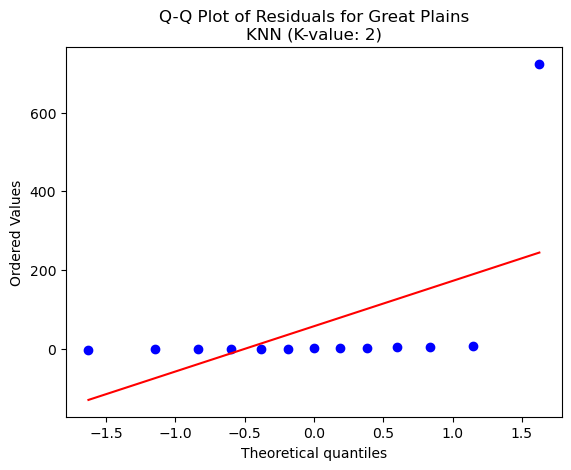

Anadarko
Number of data points:  262
Number of samples in the training dataset: 209
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 9955.088788679248
MSE of the model: 3246.0261729559757
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 56.97390782591603
MAE of the best KNN model: 15.740188679245284
-------------------------------
R-squared (Coefficient of Determination): 0.6739329762033563
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  50.943396226415096
±15%:  73.58490566037736
±25%:  79.24528301886792
±50%:  84.90566037735849
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 230.96%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.3866666666666

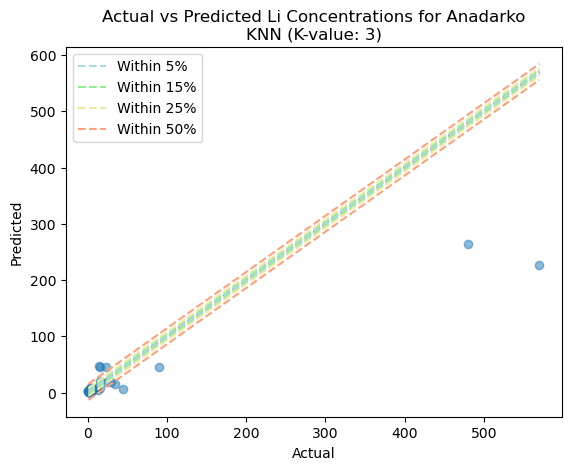

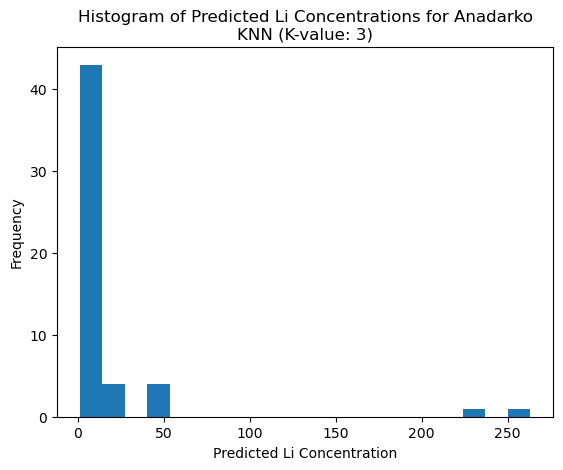

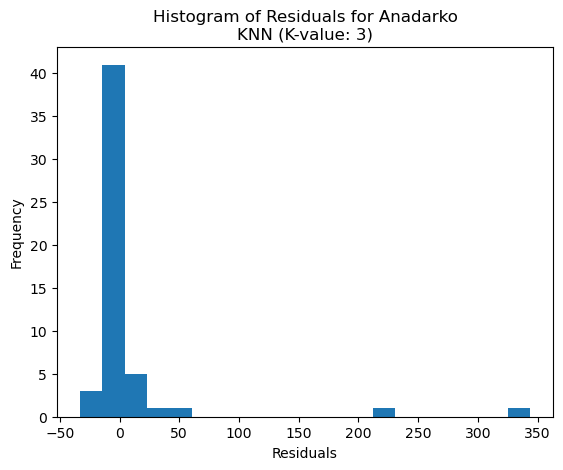

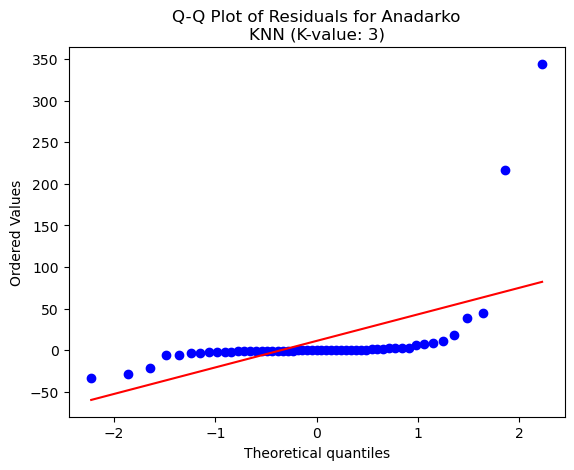

Rocky Mountain
Number of data points:  693
Number of samples in the training dataset: 554
Best k value: 2
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 214.51664095026143
MSE of the model: 78.4979154676259
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 8.859904935586268
MAE of the best KNN model: 4.144748201438849
-------------------------------
R-squared (Coefficient of Determination): 0.6340707409928784
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  13.66906474820144
±15%:  47.482014388489205
±25%:  61.15107913669065
±50%:  74.82014388489209
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 2100.00%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.5
Quanti

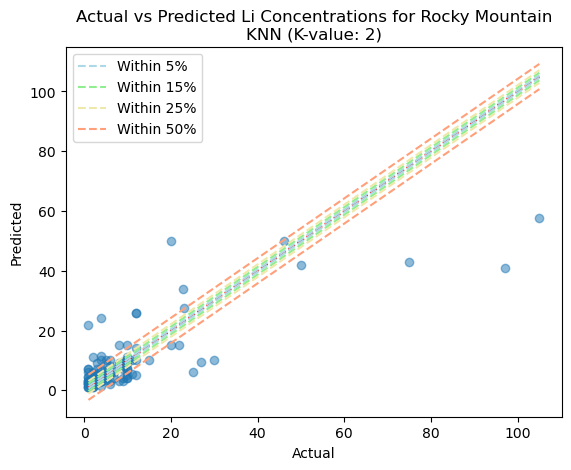

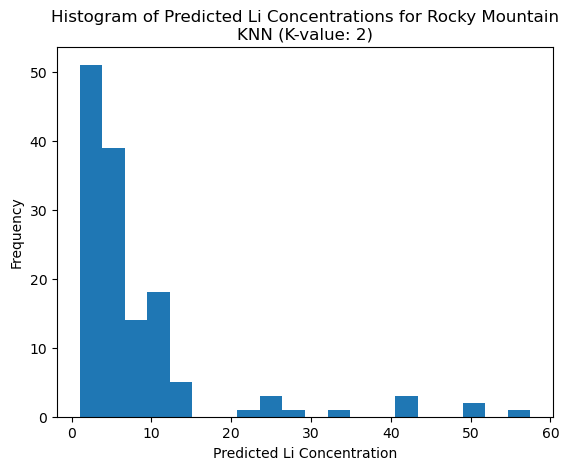

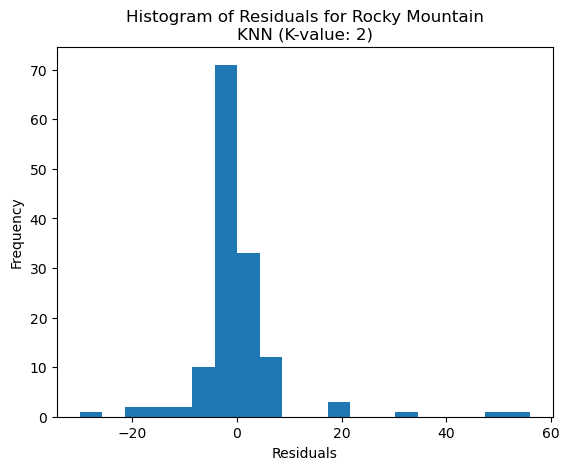

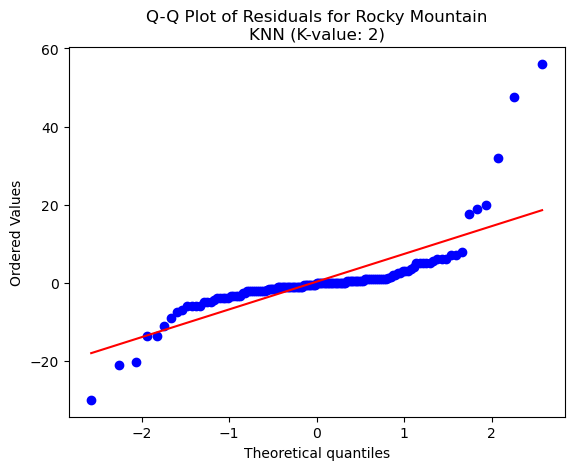

Fort Worth
Number of data points:  17
Number of samples in the training dataset: 13
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 1225.5350250000001
MSE of the model: 882.3973305555554
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 29.705173464491928
MAE of the best KNN model: 16.76083333333333
-------------------------------
R-squared (Coefficient of Determination): 0.27999011651620864
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  25.0
±15%:  25.0
±25%:  75.0
±50%:  75.0
-------------------------------
Minimum percentage difference: 31.51%
Maximum percentage difference: 169.65%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.8474999999999997
Quantile 0.5: 3.581666666666666
Quantile 0.75: 

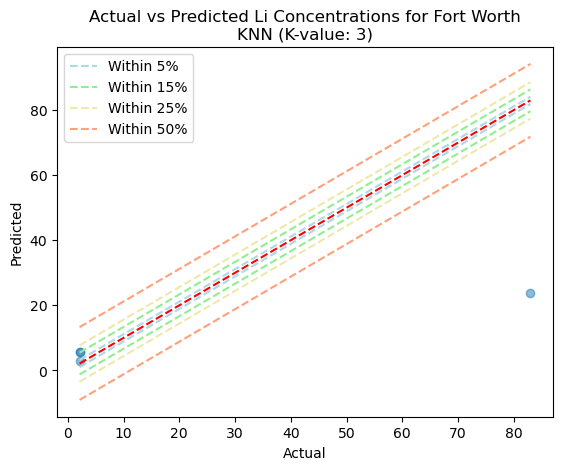

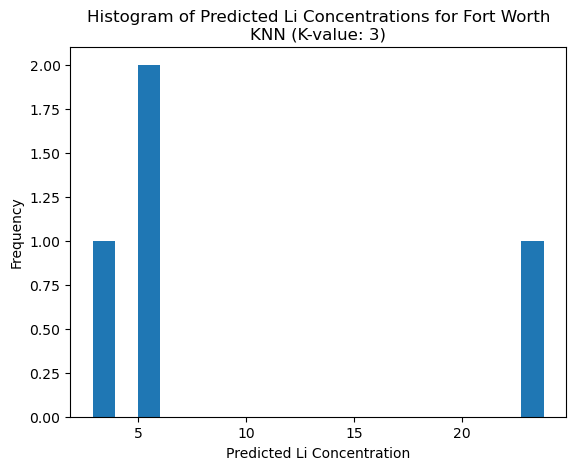

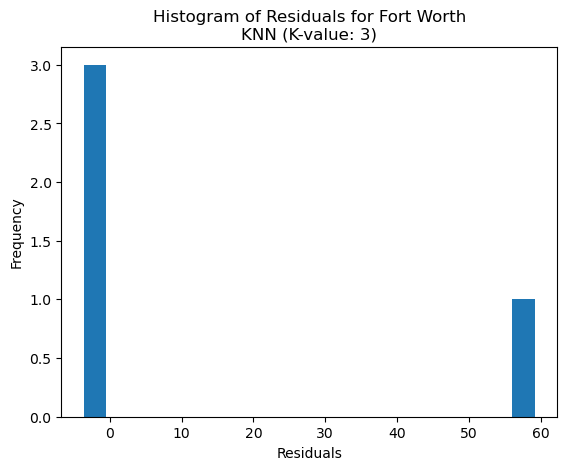

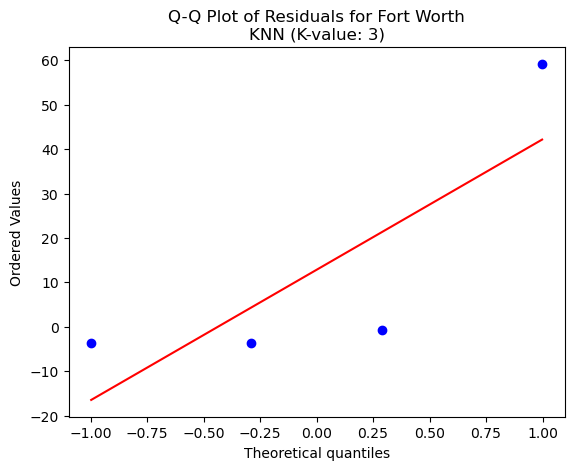

method data_input              Basin  data_row_count  feature_quantity  \
0     knn        pca        Appalachian             652                15   
1     knn        pca            Permian             481                15   
2     knn        pca  Oklahoma Platform             254                15   
3     knn        pca         Gulf Coast             888                15   
4     knn        pca          Williston             502                15   
5     knn        pca           Michigan             150                15   
6     knn        pca            Pacific             145                15   
7     knn        pca           Illinois              25                15   
8     knn        pca       Great Plains              62                15   
9     knn        pca           Anadarko             262                15   
10    knn        pca     Rocky Mountain             693                15   
11    knn        pca         Fort Worth              17                15   

                                         feature_list  k_options  best_k  \
0   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
1   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
2   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
3   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
4   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       1   
5   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
6   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
7   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
8   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
9   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
10  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
11  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   

    Explained Variance       MSE  ...  Predicted Values ±5% of Actual  \
0              3653.63   2704.31  ...                           25.19   
1              5085.17   4861.63  ...                           16.49   
2               314.13    229.30  ...                           23.53   
3              5656.33    701.87  ...                           43.26   
4              2304.89   1846.21  ...                           41.58   
5               399.73    100.73  ...                           23.33   
6                10.36      5.17  ...                           27.59   
7               191.20    146.06  ...                           20.00   
8             37307.22  40328.95  ...                           76.92   
9              9955.09   3246.03  ...                           50.94   
10              214.52     78.50  ...                           13.67   
11             1225.54    882.40  ...                           25.00   

    Predicted Values ±15% of Actual  Predicted Values ±25% of Actual  \
0                             48.09                            64.12   
1                             44.33                            65.98   
2                             29.41                            43.14   
3                             62.36                            75.84   
4                             66.34                            75.25   
5                             36.67                            50.00   
6                             48.28                            58.62   
7                             40.00                            40.00   
8                             92.31                            92.31   
9                             73.58                            79.25   
10                            47.48                            61.15   
11                            25.00                            75.00   

    Predicted Values ±50% of Actual  results_min%_difference  \
0                             80.92                     0.00 

In [173]:
# Define all the variables...
basins = df['BASIN_CATEGORY'].unique()
data_input = 'pca'
test_size = 0.2
random_state = 42
k_values = list(range(1, 4))

# Run the function...
df_results_pca = generate_knn_models_by_basin(df=df, data_input=data_input, basins=basins, test_size=test_size, random_state=random_state, k_values=k_values)
df_results_pca

### INPUT: No PCA

In [174]:
# Define the input df for this section
df = df_with_imputed.copy()

# Drop the columns that are not needed (reducing DF to have the same variables as what was input to PCA (see data preprocessing file for detail))
columns_to_drop = ['IDUSGS', 'API', 'DATESAMPLE', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 
                   'WELLNAME', 'PERIOD', 'LATITUDE', 'LONGITUDE', 'DEPTHLOWER', 'CHARGEBAL', 'PH']
df.drop(columns_to_drop, axis=1, inplace=True)
print("Remaining columns: ", df.columns.values)

Remaining columns:  ['TDS' 'DEPTHUPPER' 'B' 'Ba' 'Br' 'HCO3' 'Ca' 'Cl' 'FeTot' 'K' 'Li' 'Mg'
 'Na' 'SO4' 'Sr' 'Zn' 'BASIN_CATEGORY']


Appalachian
Number of data points:  652
Number of samples in the training dataset: 521
Best k value: 1
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 3653.6271444554536
MSE of the model: 1007.4097885496182
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 31.73971941510539
MAE of the best KNN model: 18.001297709923666
-------------------------------
R-squared (Coefficient of Determination): 0.724271320329331
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  34.35114503816794
±15%:  58.778625954198475
±25%:  67.17557251908397
±50%:  82.44274809160305
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 1513.64%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.200000000

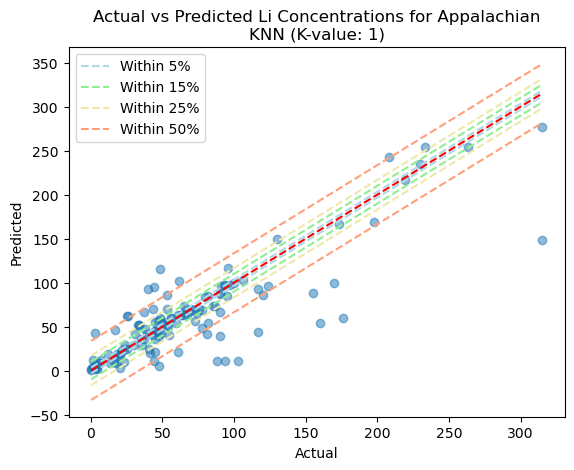

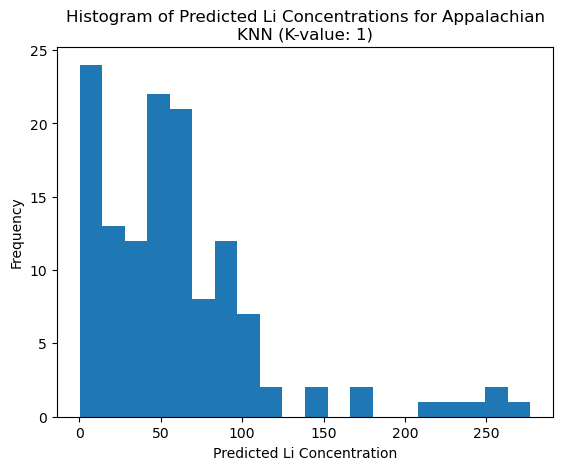

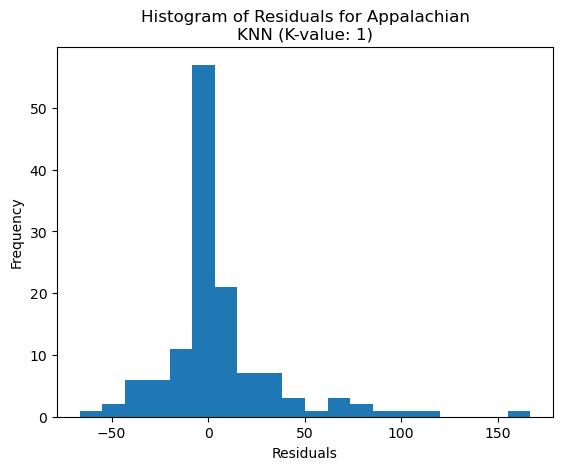

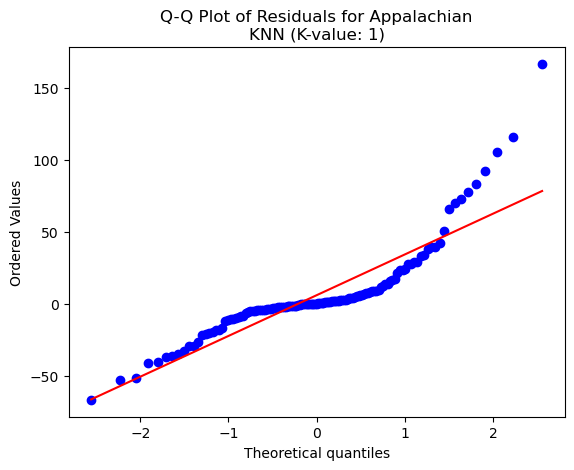

Permian
Number of data points:  481
Number of samples in the training dataset: 384
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 5085.172136847698
MSE of the model: 4763.865208934708
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 69.02075926078116
MAE of the best KNN model: 15.977938144329901
-------------------------------
R-squared (Coefficient of Determination): 0.06318506419571623
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  17.525773195876287
±15%:  40.20618556701031
±25%:  60.824742268041234
±50%:  88.65979381443299
-------------------------------
Minimum percentage difference: 0.57%
Maximum percentage difference: 520.67%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.7999999999999

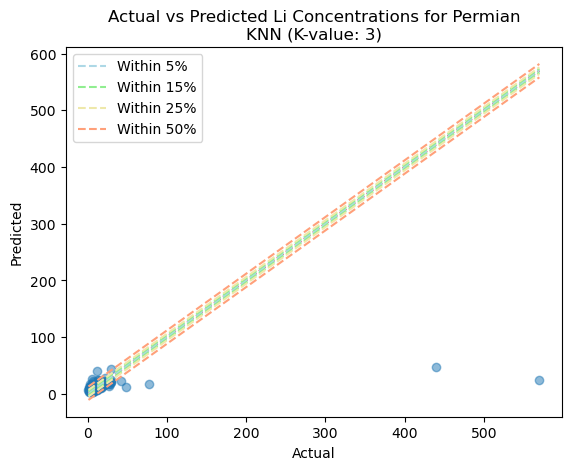

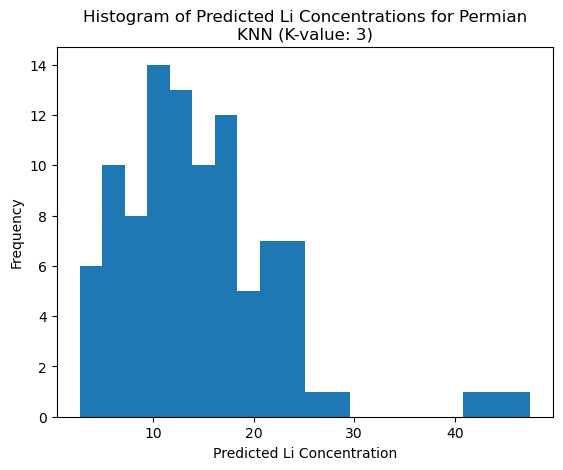

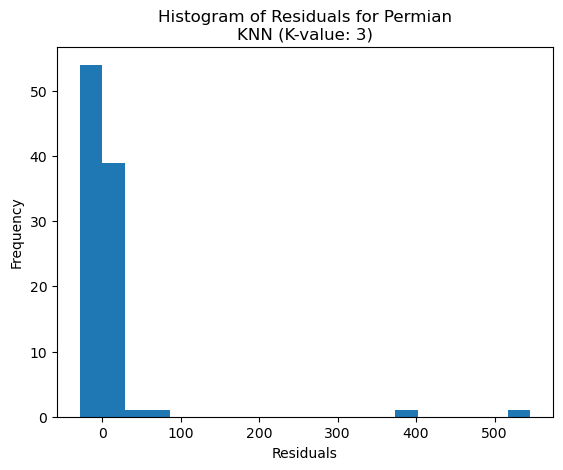

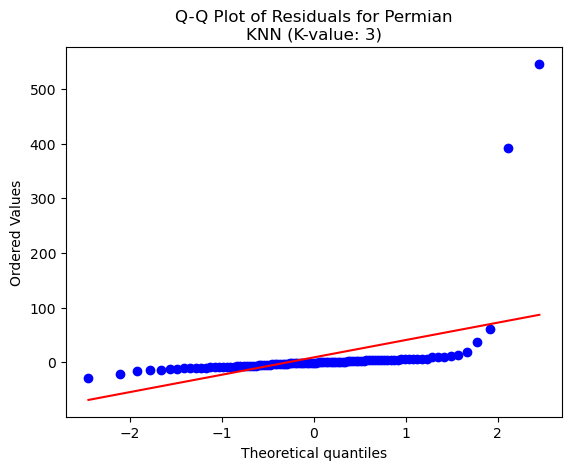

Oklahoma Platform
Number of data points:  254
Number of samples in the training dataset: 203
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 314.12745428681274
MSE of the model: 278.04526623093676
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 16.674689389339065
MAE of the best KNN model: 11.811895424836603
-------------------------------
R-squared (Coefficient of Determination): 0.11486480268907462
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  11.76470588235294
±15%:  23.52941176470588
±25%:  39.21568627450981
±50%:  54.90196078431373
-------------------------------
Minimum percentage difference: 0.47%
Maximum percentage difference: 344.37%
-------------------------------
Quantile regression loss:
Quantile 0.25: 3.29

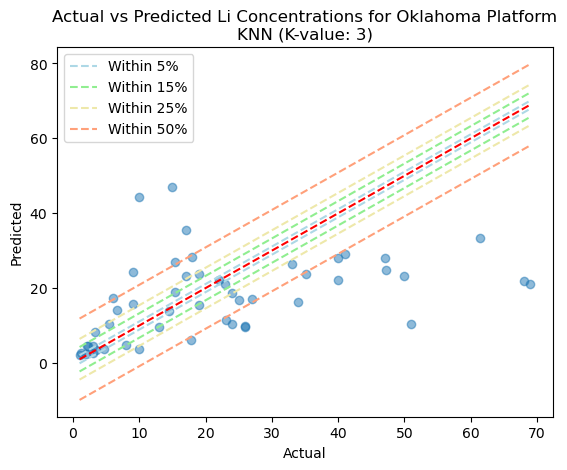

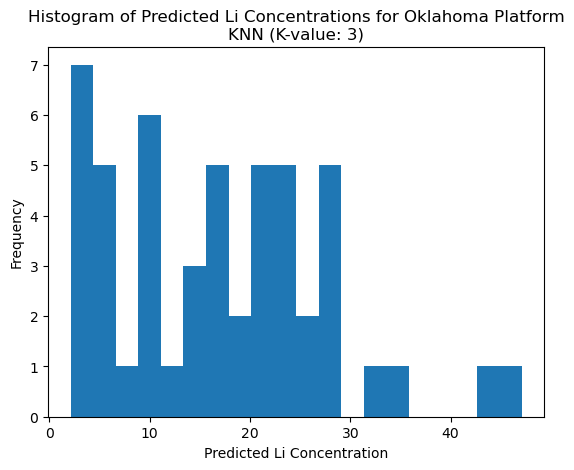

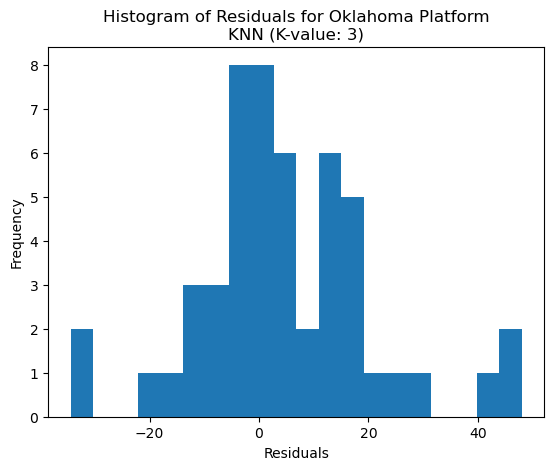

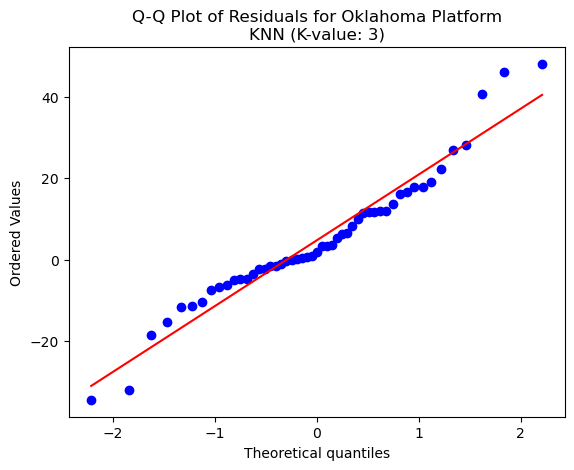

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 710
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 5656.327572816109
MSE of the model: 2008.7908077696443
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 44.819536005737994
MAE of the best KNN model: 12.24930997565543
-------------------------------
R-squared (Coefficient of Determination): 0.6448595344046651
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  41.57303370786517
±15%:  69.10112359550563
±25%:  78.08988764044943
±50%:  86.51685393258427
-------------------------------
Minimum percentage difference: 0.20%
Maximum percentage difference: 5744.40%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.04
Quantile

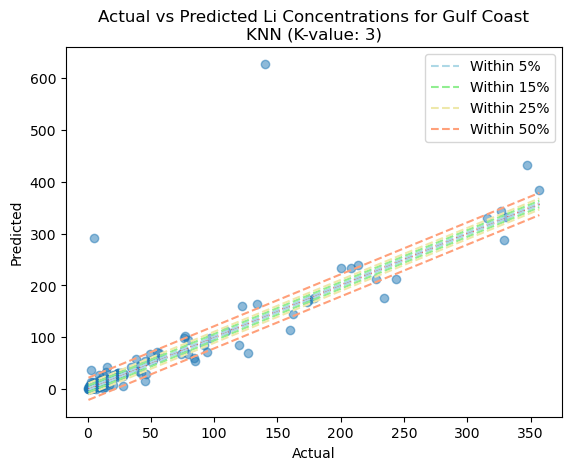

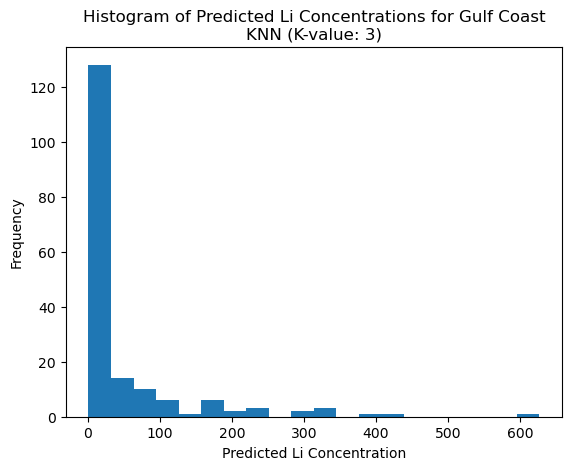

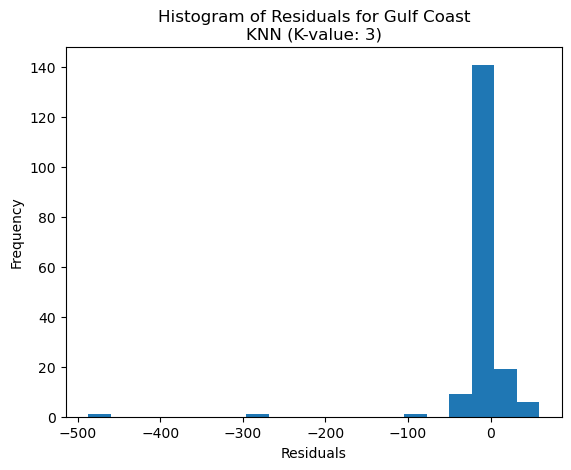

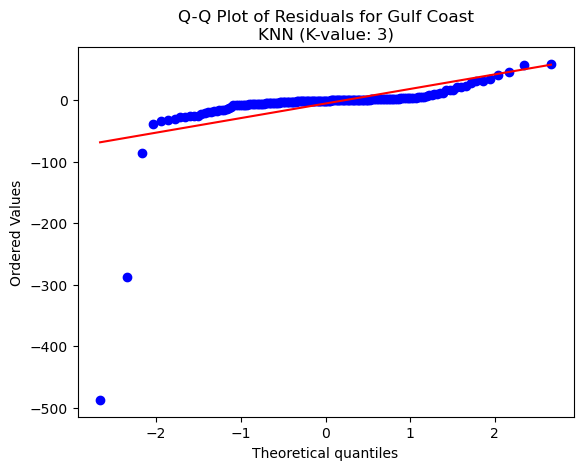

Williston
Number of data points:  502
Number of samples in the training dataset: 401
Best k value: 2
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 2304.8861222313562
MSE of the model: 198.65425634306914
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 14.094476093245508
MAE of the best KNN model: 7.988884158389307
-------------------------------
R-squared (Coefficient of Determination): 0.9138116827434614
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  38.613861386138616
±15%:  60.396039603960396
±25%:  74.25742574257426
±50%:  85.14851485148515
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 26215.79%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.5
Quanti

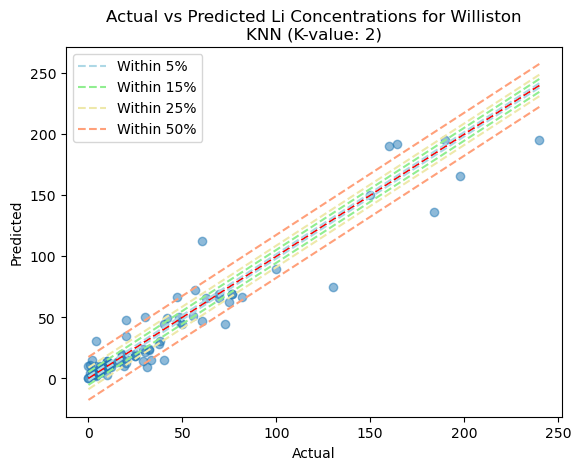

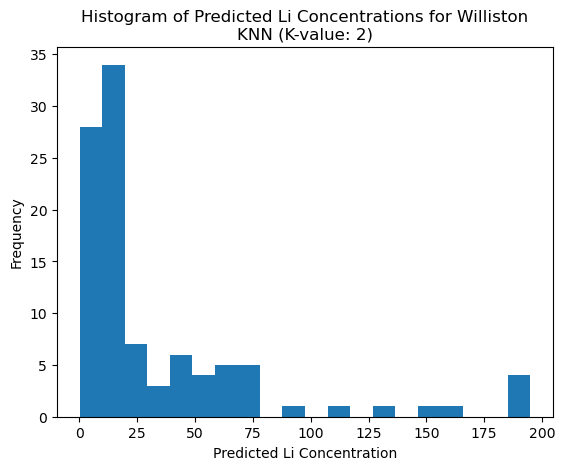

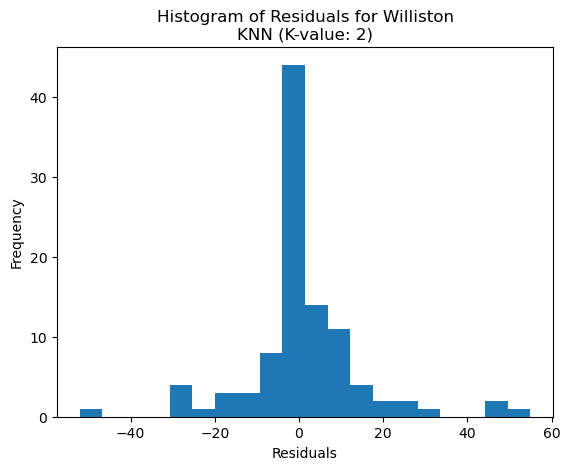

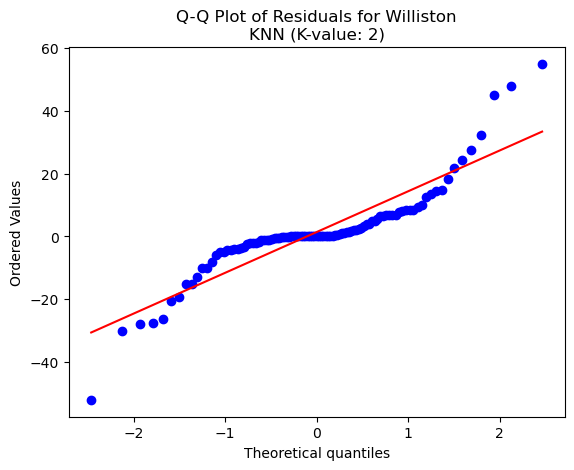

Michigan
Number of data points:  150
Number of samples in the training dataset: 120
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 399.72542455555555
MSE of the model: 152.8469251851852
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 12.363127645753124
MAE of the best KNN model: 8.738222222222221
-------------------------------
R-squared (Coefficient of Determination): 0.6176202067828641
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  13.333333333333334
±15%:  33.33333333333333
±25%:  50.0
±50%:  76.66666666666667
-------------------------------
Minimum percentage difference: 2.56%
Maximum percentage difference: 1255.00%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.4333333333333327
Quantile

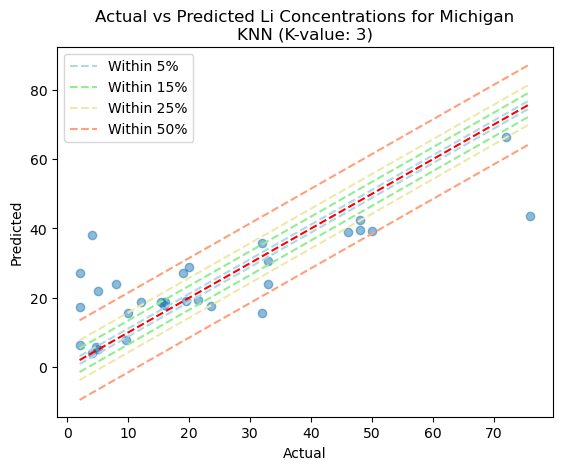

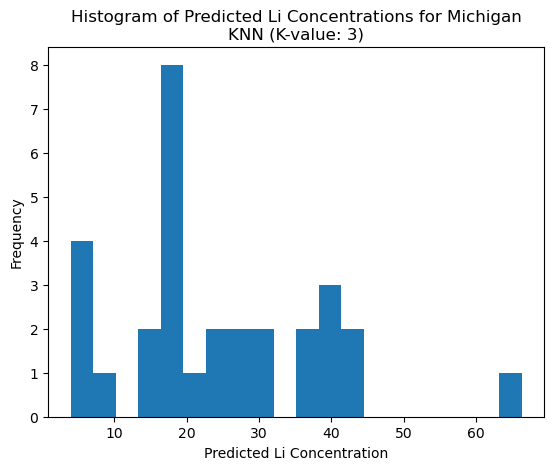

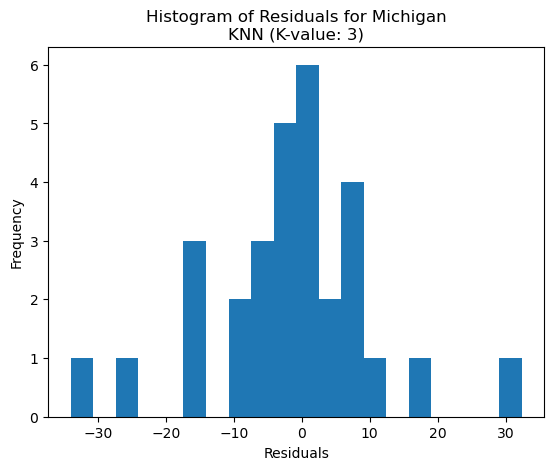

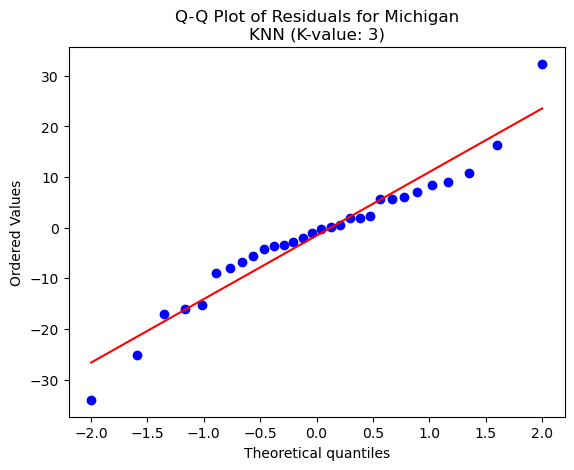

Pacific
Number of data points:  145
Number of samples in the training dataset: 116
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 10.355265992865641
MSE of the model: 3.0118201149425285
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 1.7354596264225015
MAE of the best KNN model: 0.95183908045977
-------------------------------
R-squared (Coefficient of Determination): 0.709150869034407
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  31.03448275862069
±15%:  41.37931034482759
±25%:  51.724137931034484
±50%:  82.75862068965517
-------------------------------
Minimum percentage difference: 1.02%
Maximum percentage difference: 8449.02%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.09999999999999

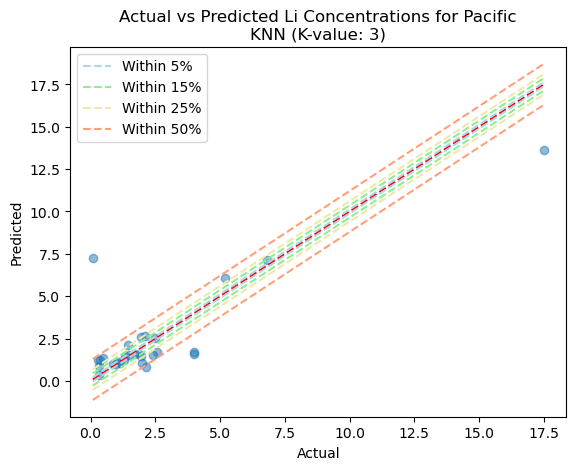

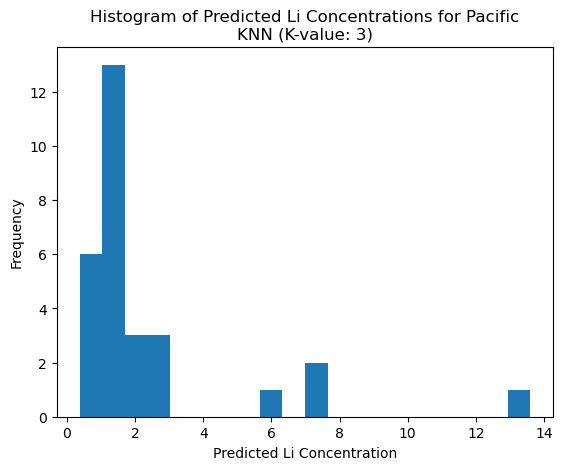

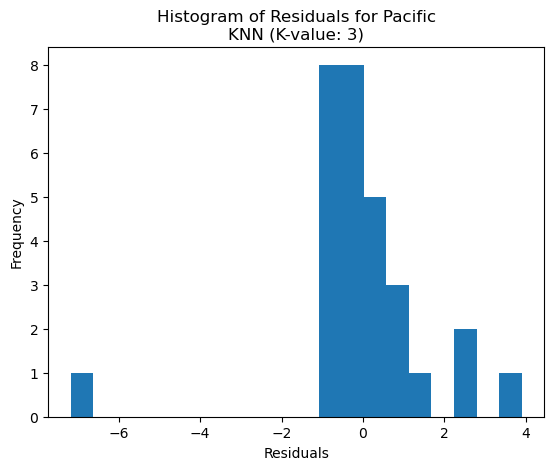

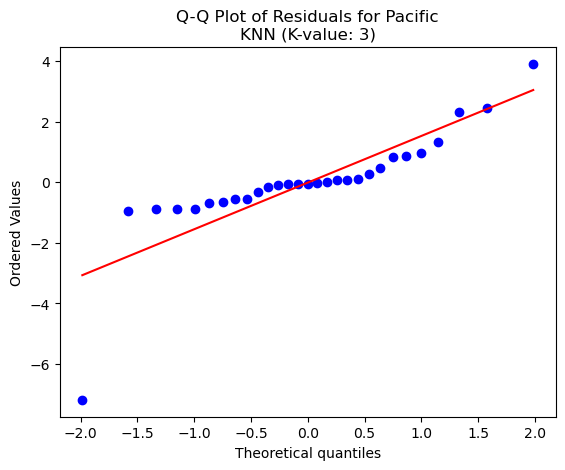

Illinois
Number of data points:  25
Number of samples in the training dataset: 20
Best k value: 2
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 191.199984
MSE of the model: 34.582124999999984
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 5.880656851066893
MAE of the best KNN model: 4.606999999999999
-------------------------------
R-squared (Coefficient of Determination): 0.8191311302620193
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  20.0
±15%:  60.0
±25%:  60.0
±50%:  80.0
-------------------------------
Minimum percentage difference: 16.00%
Maximum percentage difference: 40.09%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.7149999999999999
Quantile 0.5: 2.3999999999999986
Quantile 0.75: 8.5
-------

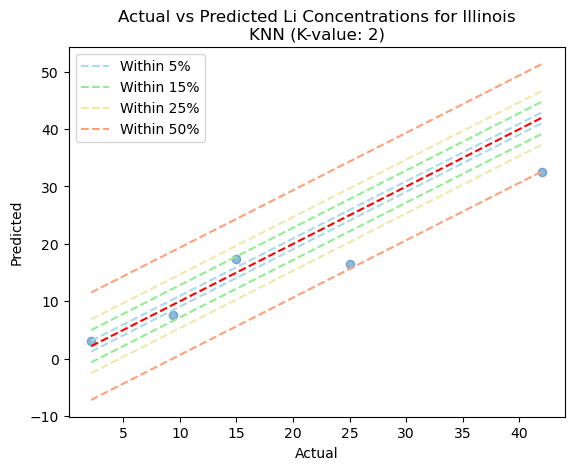

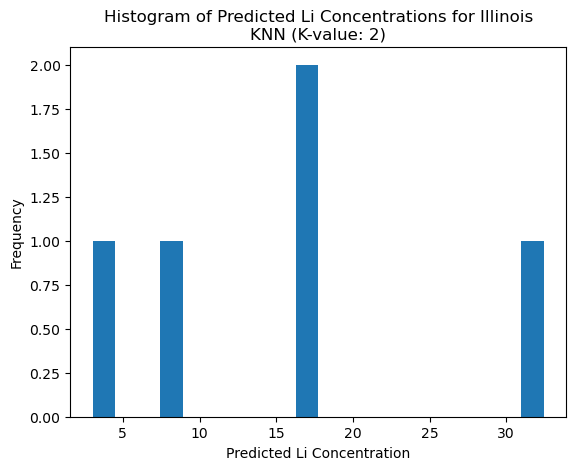

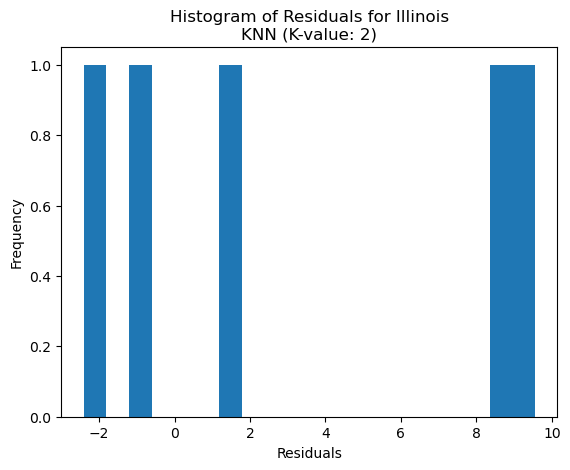

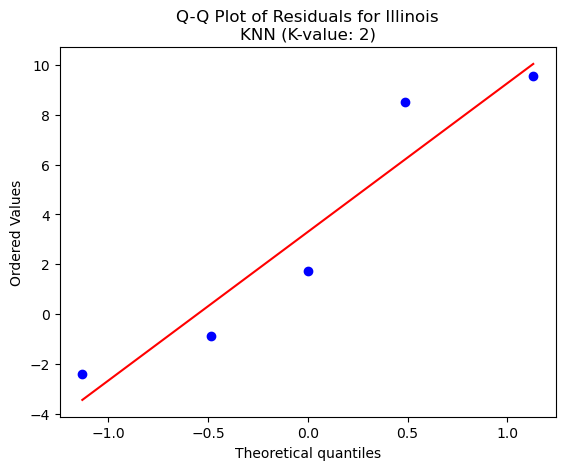

Great Plains
Number of data points:  62
Number of samples in the training dataset: 49
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 37307.22484852071
MSE of the model: 39732.89348205128
The model's MSE is close to or larger than the variance of the target variable.
The model's performance may be limited compared to the variability of the target variable.
RMSE of the model: 199.33111518789855
MAE of the best KNN model: 56.55076923076923
-------------------------------
R-squared (Coefficient of Determination): -0.0650187368098154
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  84.61538461538461
±15%:  92.3076923076923
±25%:  92.3076923076923
±50%:  92.3076923076923
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 98.58%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.46

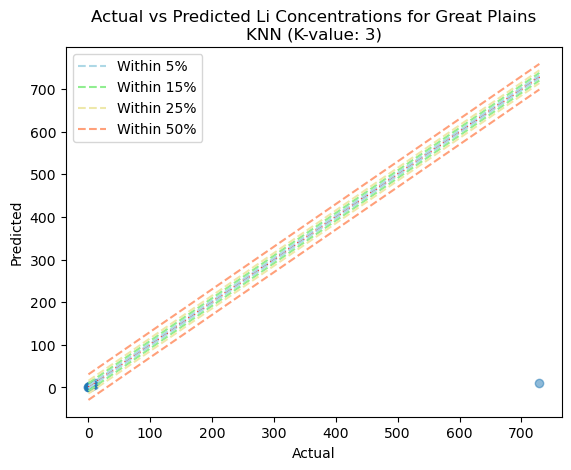

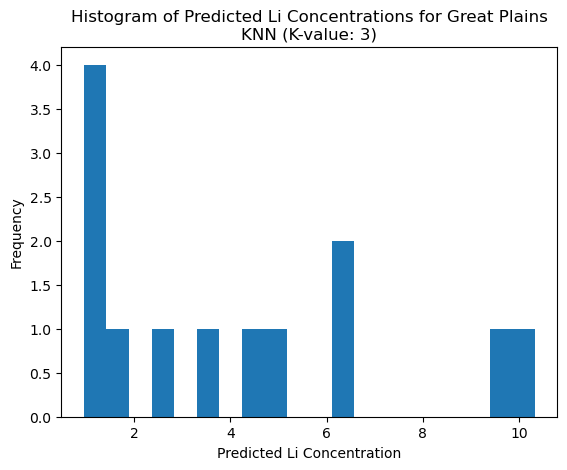

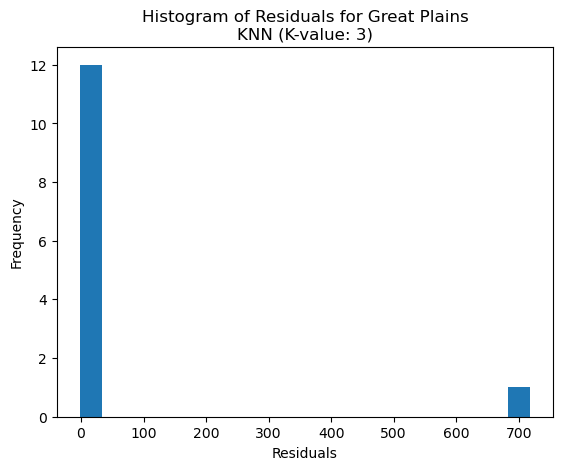

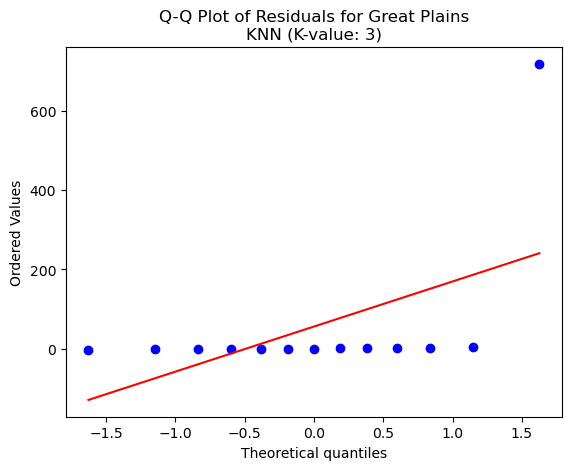

Anadarko
Number of data points:  262
Number of samples in the training dataset: 209
Best k value: 3
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 9955.088788679248
MSE of the model: 3362.4135624737955
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 57.986322201651966
MAE of the best KNN model: 16.12496855345912
-------------------------------
R-squared (Coefficient of Determination): 0.6622417304507144
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  58.490566037735846
±15%:  73.58490566037736
±25%:  77.35849056603774
±50%:  84.90566037735849
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 267.78%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.0733333333333

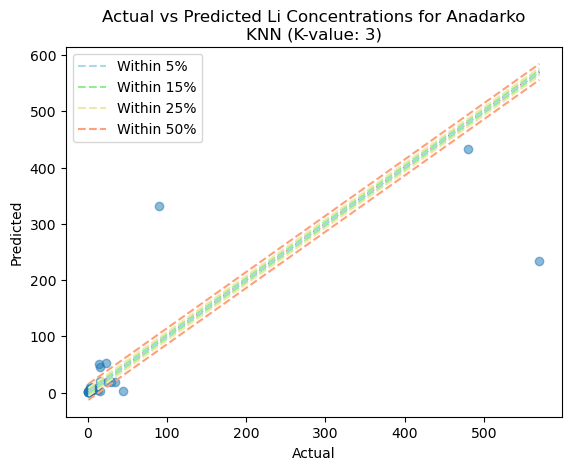

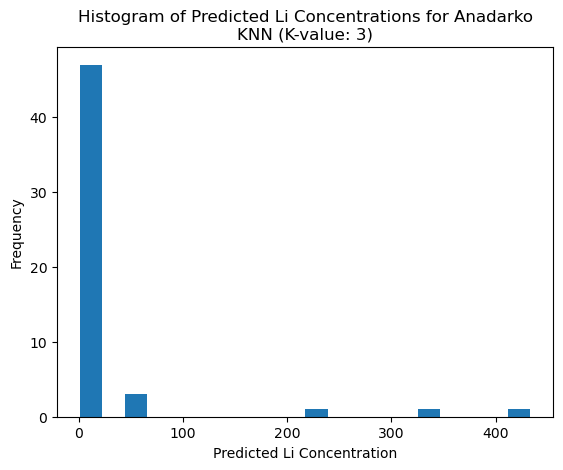

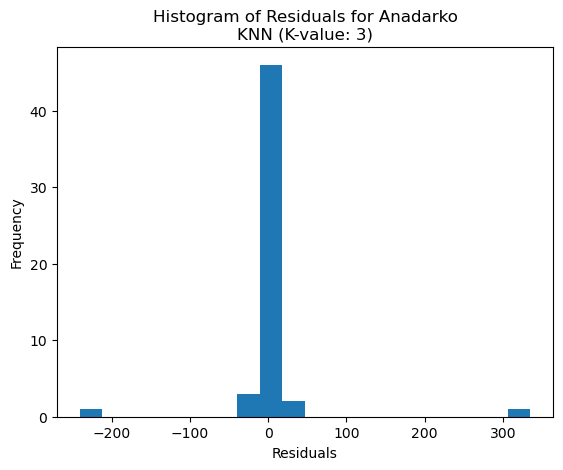

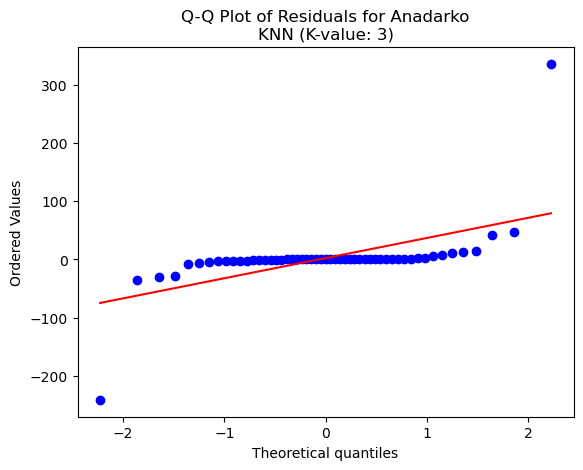

Rocky Mountain
Number of data points:  693
Number of samples in the training dataset: 554
Best k value: 2
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 214.51664095026143
MSE of the model: 60.40755647482014
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 7.772229826428201
MAE of the best KNN model: 3.470071942446043
-------------------------------
R-squared (Coefficient of Determination): 0.7184015365557282
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  15.827338129496402
±15%:  50.35971223021583
±25%:  67.62589928057554
±50%:  76.97841726618705
-------------------------------
Minimum percentage difference: 0.00%
Maximum percentage difference: 650.00%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.5
Quanti

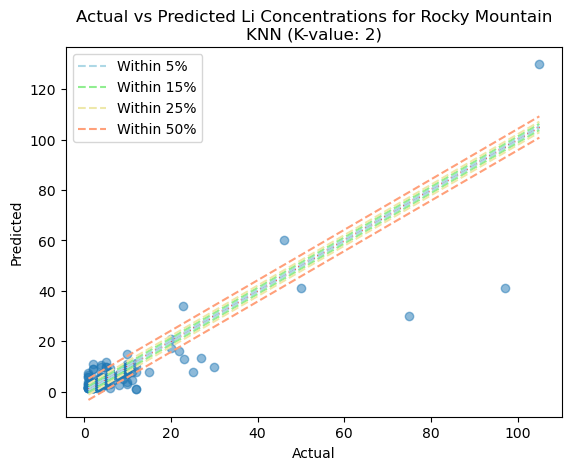

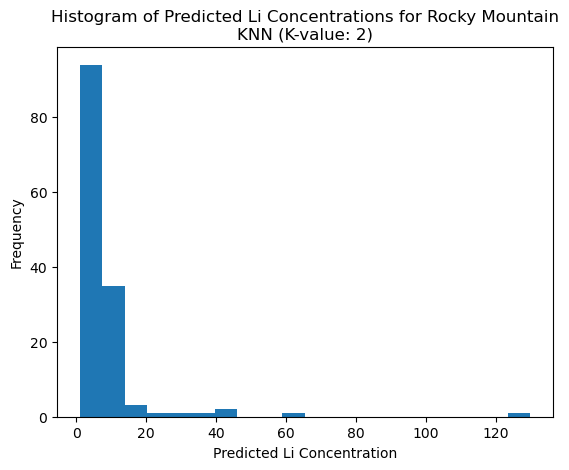

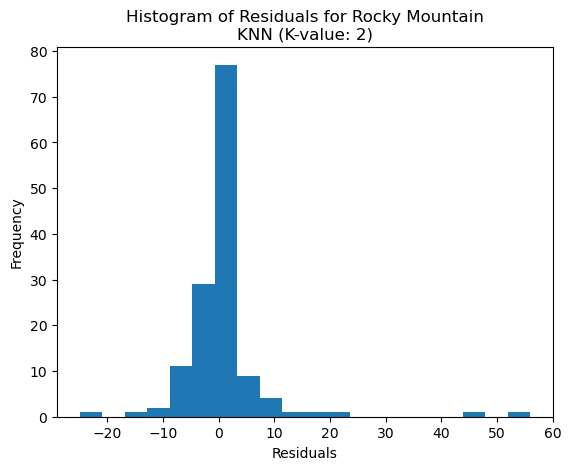

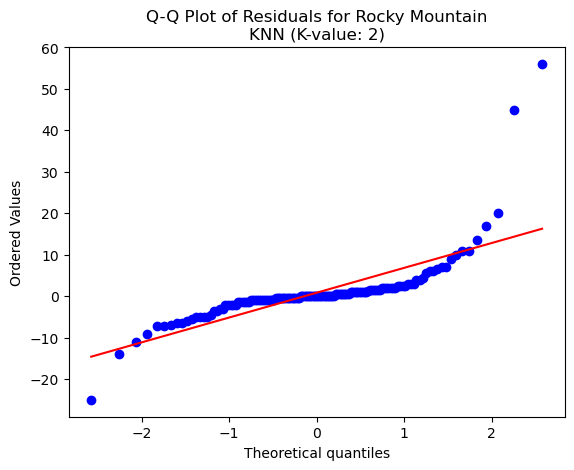

Fort Worth
Number of data points:  17
Number of samples in the training dataset: 13
Best k value: 2
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 1225.5350250000001
MSE of the model: 958.3382375
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 30.95703857768052
MAE of the best KNN model: 16.965
-------------------------------
R-squared (Coefficient of Determination): 0.21802460317280614
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  25.0
±15%:  50.0
±25%:  75.0
±50%:  75.0
-------------------------------
Minimum percentage difference: 52.36%
Maximum percentage difference: 163.47%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.3162500000000001
Quantile 0.5: 2.4825
Quantile 0.75: 18.131249999999998
----------

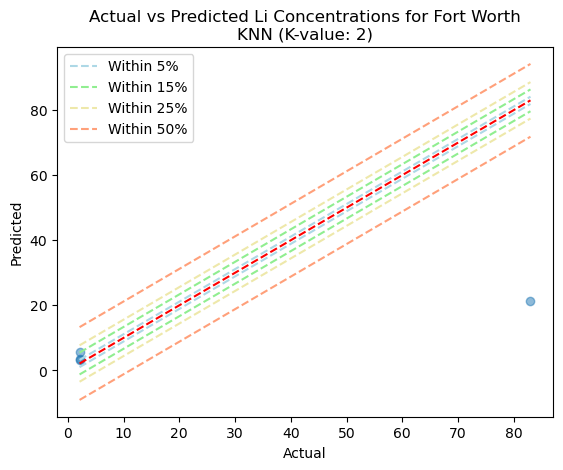

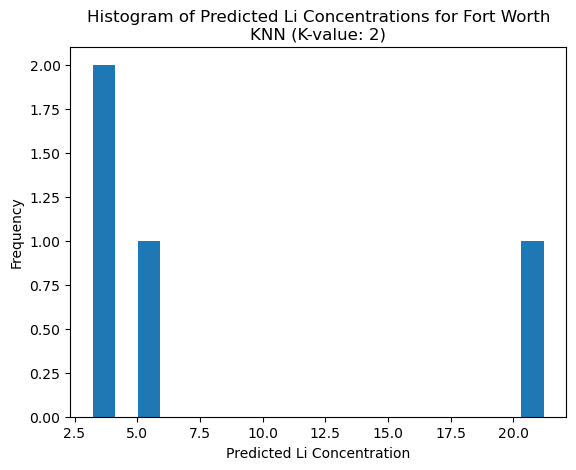

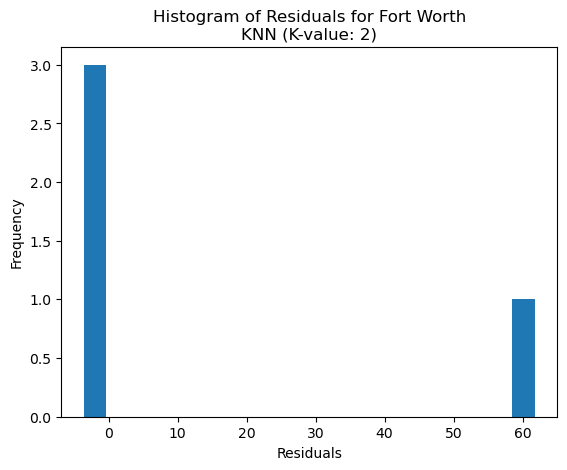

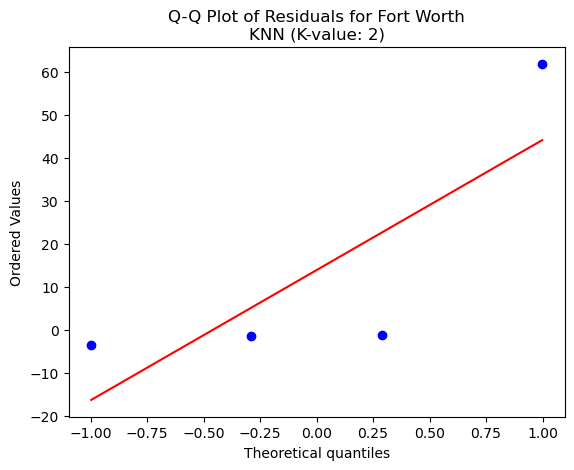

method data_input              Basin  data_row_count  feature_quantity  \
0     knn     no_pca        Appalachian             652                15   
1     knn     no_pca            Permian             481                15   
2     knn     no_pca  Oklahoma Platform             254                15   
3     knn     no_pca         Gulf Coast             888                15   
4     knn     no_pca          Williston             502                15   
5     knn     no_pca           Michigan             150                15   
6     knn     no_pca            Pacific             145                15   
7     knn     no_pca           Illinois              25                15   
8     knn     no_pca       Great Plains              62                15   
9     knn     no_pca           Anadarko             262                15   
10    knn     no_pca     Rocky Mountain             693                15   
11    knn     no_pca         Fort Worth              17                15   

                                         feature_list  k_options  best_k  \
0   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       1   
1   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
2   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
3   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
4   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
5   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
6   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
7   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
8   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
9   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
10  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
11  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   

    Explained Variance       MSE  ...  Predicted Values ±5% of Actual  \
0              3653.63   1007.41  ...                           34.35   
1              5085.17   4763.87  ...                           17.53   
2               314.13    278.05  ...                           11.76   
3              5656.33   2008.79  ...                           41.57   
4              2304.89    198.65  ...                           38.61   
5               399.73    152.85  ...                           13.33   
6                10.36      3.01  ...                           31.03   
7               191.20     34.58  ...                           20.00   
8             37307.22  39732.89  ...                           84.62   
9              9955.09   3362.41  ...                           58.49   
10              214.52     60.41  ...                           15.83   
11             1225.54    958.34  ...                           25.00   

    Predicted Values ±15% of Actual  Predicted Values ±25% of Actual  \
0                             58.78                            67.18   
1                             40.21                            60.82   
2                             23.53                            39.22   
3                             69.10                            78.09   
4                             60.40                            74.26   
5                             33.33                            50.00   
6                             41.38                            51.72   
7                             60.00                            60.00   
8                             92.31                            92.31   
9                             73.58                            77.36   
10                            50.36                            67.63   
11                            50.00                            75.00   

    Predicted Values ±50% of Actual  results_min%_difference  \
0                             82.44                     0.00 

In [175]:
# Define all the variables...
basins = df['BASIN_CATEGORY'].unique()
data_input = 'no_pca'
test_size = 0.2
random_state = 42
k_values = list(range(1, 4))

# Run the function...
df_results_no_pca = generate_knn_models_by_basin(df=df, data_input=data_input, basins=basins, test_size=test_size, random_state=random_state, k_values=k_values)
df_results_no_pca

## <ins>Evaluate results

### Merge all results dfs into 1 large df for evaluation

In [176]:
model = 'knn'

# Save individual result dfs to csv files
df_results_pca.to_csv(f'../../data/performance_comparison/{model}_performance_pca.csv', index=False)
df_results_no_pca.to_csv(f'../../data/performance_comparison/{model}_performance_no_pca.csv', index=False)

dfs = [df_results_pca, df_results_no_pca]

# Concatenate the list of DataFrames into one large DataFrame
df_all_results = pd.concat(dfs)

# Resetting index to avoid duplicate indices
df_all_results.reset_index(drop=True, inplace=True)

# Save to csv
df_all_results.to_csv(f'../../data/performance_comparison/{model}_performance_all_results.csv', index=False)

# View
df_all_results

method data_input              Basin  data_row_count  feature_quantity  \
0     knn        pca        Appalachian             652                15   
1     knn        pca            Permian             481                15   
2     knn        pca  Oklahoma Platform             254                15   
3     knn        pca         Gulf Coast             888                15   
4     knn        pca          Williston             502                15   
5     knn        pca           Michigan             150                15   
6     knn        pca            Pacific             145                15   
7     knn        pca           Illinois              25                15   
8     knn        pca       Great Plains              62                15   
9     knn        pca           Anadarko             262                15   
10    knn        pca     Rocky Mountain             693                15   
11    knn        pca         Fort Worth              17                15   
12    knn     no_pca        Appalachian             652                15   
13    knn     no_pca            Permian             481                15   
14    knn     no_pca  Oklahoma Platform             254                15   
15    knn     no_pca         Gulf Coast             888                15   
16    knn     no_pca          Williston             502                15   
17    knn     no_pca           Michigan             150                15   
18    knn     no_pca            Pacific             145                15   
19    knn     no_pca           Illinois              25                15   
20    knn     no_pca       Great Plains              62                15   
21    knn     no_pca           Anadarko             262                15   
22    knn     no_pca     Rocky Mountain             693                15   
23    knn     no_pca         Fort Worth              17                15   

                                         feature_list  k_options  best_k  \
0   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
1   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
2   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
3   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
4   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       1   
5   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
6   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
7   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
8   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
9   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
10  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
11  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
12  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       1   
13  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
14  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
16  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
17  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
18  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
19  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
20  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
21  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
22  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
23  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   

    Explained Variance       MSE  ...  Predicted Values ±5% of Actual  \
0              3653.63   2704.31  ...                           25.19   
1              5085.17   4861.

### Create df with which model generated highest value within 15% for each basin

In [178]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent = df_all_results.groupby('Basin')['Predicted Values ±15% of Actual'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_within_15_percent = pd.merge(best_models_within_15_percent, df_all_results, on=['Basin', 'Predicted Values ±15% of Actual'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_within_15_percent.sort_values(by='Predicted Values ±15% of Actual',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_within_15_percent.reset_index(drop=True, inplace=True)
df_best_models_within_15_percent

Basin  Predicted Values ±15% of Actual method data_input  \
0        Great Plains                            92.31    knn        pca   
1        Great Plains                            92.31    knn     no_pca   
2            Anadarko                            73.58    knn        pca   
3            Anadarko                            73.58    knn     no_pca   
4          Gulf Coast                            69.10    knn     no_pca   
5           Williston                            66.34    knn        pca   
6            Illinois                            60.00    knn     no_pca   
7         Appalachian                            58.78    knn     no_pca   
8      Rocky Mountain                            50.36    knn     no_pca   
9          Fort Worth                            50.00    knn     no_pca   
10            Pacific                            48.28    knn        pca   
11            Permian                            44.33    knn        pca   
12           Michigan                            36.67    knn        pca   
13  Oklahoma Platform                            29.41    knn        pca   

    data_row_count  feature_quantity  \
0               62                15   
1               62                15   
2              262                15   
3              262                15   
4              888                15   
5              502                15   
6               25                15   
7              652                15   
8              693                15   
9               17                15   
10             145                15   
11             481                15   
12             150                15   
13             254                15   

                                         feature_list  k_options  best_k  \
0   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
1   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
2   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
3   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
4   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       3   
5   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       1   
6   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
7   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       1   
8   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
9   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [1, 2, 3]       2   
10  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       2   
11  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
12  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   
13  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [1, 2, 3]       3   

    Explained Variance  ...    R2  Predicted Values ±5% of Actual  \
0             37307.22  ... -0.08                           76.92   
1             37307.22  ... -0.07                           84.62   
2              9955.09  ...  0.67                           50.94   
3              9955.09  ...  0.66                           58.49   
4              5656.33  ...  0.64                           41.57   
5              2304.89  ...  0.20                           41.58   
6               191.20  ...  0.82                           20.00   
7              3653.63  ...  0.72                           34.35   
8               214.52  ...  0.72                           15.83   
9              1225.54  ...  0.22                           25.00   
10               10.36  ...  0.50                           27.59   
11             5085.17  ...  0.04                           16.49   
12              399.73  ...  0.75                           23.33   
13              314.13  ...  0.27                           23.53   

    Predicted Values ±25% of Actual  Predicted Values ±50% of Actual  \
0                        

### Create df with which model generated highest value of r2 for each basin

In [179]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_r2 = df_all_results.groupby('Basin')['R2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_r2 = pd.merge(best_models_r2, df_all_results, on=['Basin', 'R2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_r2.sort_values(by='R2',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_r2.reset_index(drop=True, inplace=True)
df_best_models_r2

Basin    R2 method data_input  data_row_count  \
0           Williston  0.91    knn     no_pca             502   
1          Gulf Coast  0.88    knn        pca             888   
2            Illinois  0.82    knn     no_pca              25   
3            Michigan  0.75    knn        pca             150   
4         Appalachian  0.72    knn     no_pca             652   
5      Rocky Mountain  0.72    knn     no_pca             693   
6             Pacific  0.71    knn     no_pca             145   
7            Anadarko  0.67    knn        pca             262   
8          Fort Worth  0.28    knn        pca              17   
9   Oklahoma Platform  0.27    knn        pca             254   
10            Permian  0.06    knn     no_pca             481   
11       Great Plains -0.07    knn     no_pca              62   

    feature_quantity                                       feature_list  \
0                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
1                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
2                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
3                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
4                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
5                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
6                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
7                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
8                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
9                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
10                15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
11                15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   

    k_options  best_k  Explained Variance  ...  \
0   [1, 2, 3]       2             2304.89  ...   
1   [1, 2, 3]       3             5656.33  ...   
2   [1, 2, 3]       2              191.20  ...   
3   [1, 2, 3]       3              399.73  ...   
4   [1, 2, 3]       1             3653.63  ...   
5   [1, 2, 3]       2              214.52  ...   
6   [1, 2, 3]       3               10.36  ...   
7   [1, 2, 3]       3             9955.09  ...   
8   [1, 2, 3]       3             1225.54  ...   
9   [1, 2, 3]       3              314.13  ...   
10  [1, 2, 3]       3             5085.17  ...   
11  [1, 2, 3]       3            37307.22  ...   

    Predicted Values ±5% of Actual  Predicted Values ±15% of Actual  \
0                            38.61                            60.40   
1                            43.26                            62.36   
2                            20.00                            60.00   
3                            23.33                            36.67   
4                            34.35                            58.78   
5                            15.83                            50.36   
6                            31.03                            41.38   
7                            50.94                            73.58   
8                            25.00                            25.00   
9                            23.53                            29.41   
10                           17.53                            40.21   
11                           84.62                            92.31   

    Predicted Values ±25% of Actual  Predicted Values ±50% of Actual  \
0                             74.26                            85.15   
1                             75.84                            87.08   
2                             60.00                            80.00   
3                             50.00                            86.67   
4                             67.18                            82.44   
5                             67.63                            76.98   
6                             51.72                            82.76   
7                             79.25        

## <ins>Performance comparison plot

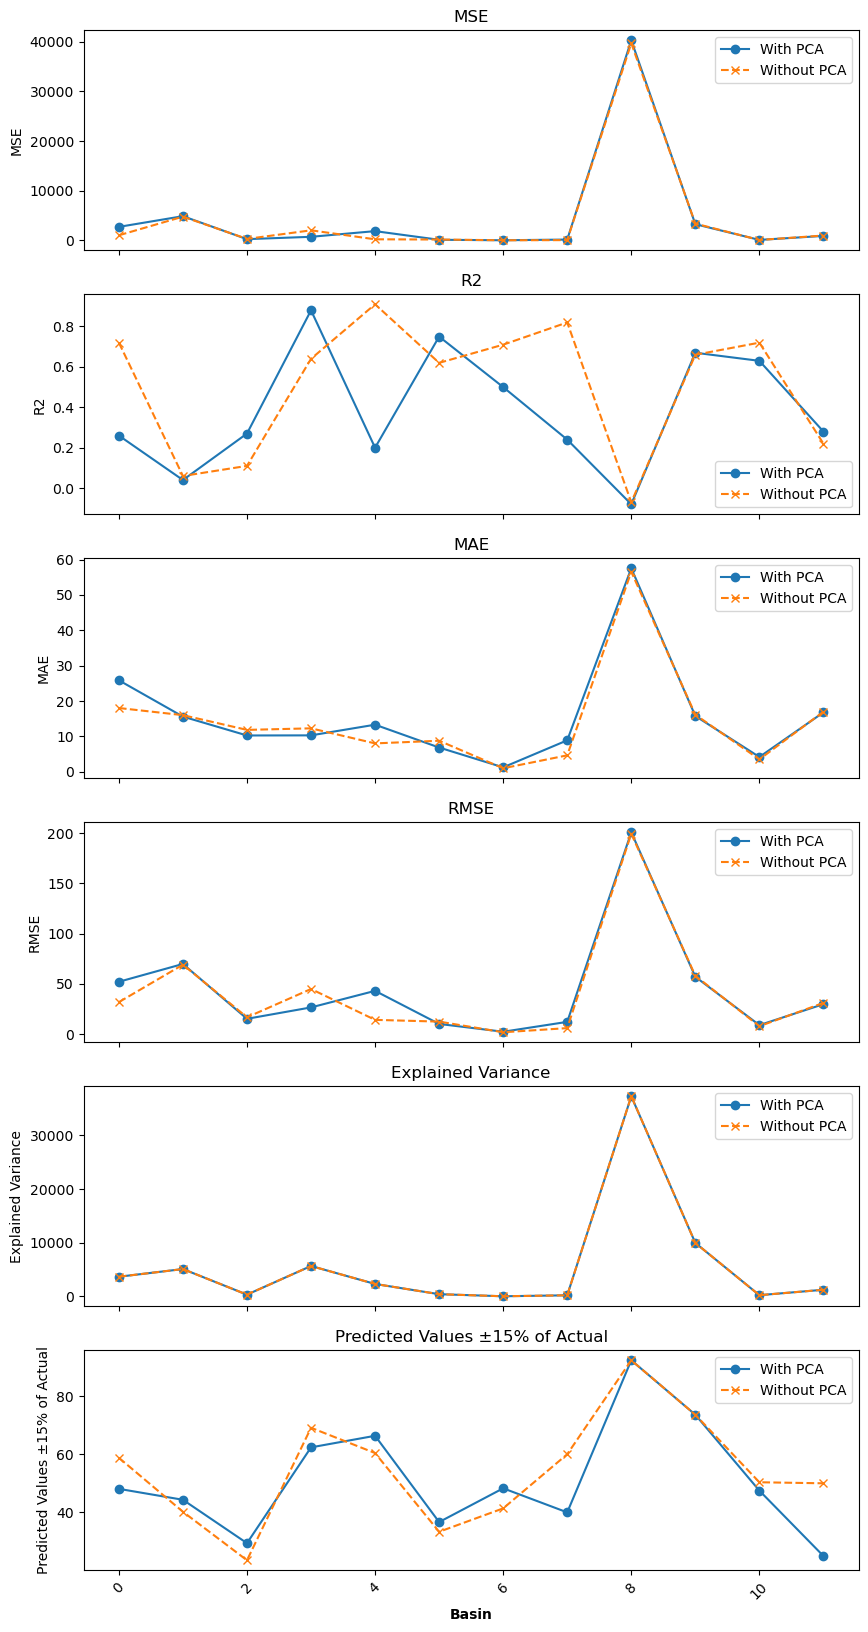

In [180]:
# Define the metrics to compare
metrics = ['MSE', 'R2', 'MAE', 'RMSE', 'Explained Variance', 'Predicted Values ±15% of Actual']

# Merge the two results DataFrames
df_all_results = df_results_pca.join(df_results_no_pca, lsuffix='_with_pca', rsuffix='_without_pca')

# Create a figure and axes for the subplots
fig, axs = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 20), sharex=True)

# Plot comparisons for each metric
for idx, metric in enumerate(metrics):
    axs[idx].plot(df_all_results.index, df_all_results[metric + '_with_pca'], marker='o', label='With PCA', linestyle='-')
    axs[idx].plot(df_all_results.index, df_all_results[metric + '_without_pca'], marker='x', label='Without PCA', linestyle='--')
    
    axs[idx].set_ylabel(metric)
    axs[idx].set_title(metric)
    axs[idx].legend()

# Set common labels
plt.xlabel('Basin', fontweight='bold')
plt.xticks(rotation=45)
plt.savefig(f"../../images/performance_comparison_plots/{model}_performance_comparison.png")
plt.show()

### .

In [181]:
# Record end time
end_time = time.time()

# Calculate total run time
total_time = end_time - start_time

print(f"Total run time: {total_time} seconds | {total_time/60} minutes")

Total run time: 136.37154507637024 seconds | 2.2728590846061705 minutes
